# Bike Rentals EDA v01
Linh Toan

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Imports and Settings

In [7]:
# Customize seaborn plot styles
# Seaborn docs: https://seaborn.pydata.org/tutorial/aesthetics.html

# Adjust to retina quality
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

# Adjust dpi and font size
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook', font_scale = 0.8)

# Display tick marks
sns.set_style('ticks')

# Remove borders
plt.rc('axes.spines', top=False, right=False, left=False, bottom=False)

In [8]:
# Color palettes for plots
# Named colors: https://matplotlib.org/stable/gallery/color/named_colors.html
# Seaborn color palette docs: https://seaborn.pydata.org/tutorial/color_palettes.html
# Seaborn palette chart: https://www.codecademy.com/article/seaborn-design-ii

# cp1 Color Palette - a binary blue/orange palette
blue = 'deepskyblue' # Use 'skyblue' for a lighter blue
orange = 'orange'
cp1 = [blue, orange]

# cp2 Palette - Reversed binary color order when needed for certain plots
cp2 = [orange, blue]

# cp5 Palette - 5 colors for use with categorical data
turqoise = 'mediumaquamarine'
salmon = 'darksalmon'
tan = 'tan'
gray = 'darkgray'
cp5 = [blue, turqoise, salmon, tan, gray]

# cpd Palette - blue-to-orange diverging palette for correlation heatmaps
cpd = sns.diverging_palette(242, 39, s=100, l=65, n=11)

# Set the default palette
sns.set_palette(cp1)

# Read Data

In [16]:

import mltable
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

ml_client = MLClient.from_config(credential=DefaultAzureCredential())
data_asset = ml_client.data.get("bike-rentals", version="1")

tbl = mltable.load(f'azureml:/{data_asset.id}')

df = tbl.to_pandas_dataframe()

df.sample(20)

Found the config file in: /config.json


,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
171,21,6,2011,3,0,2,1,2,0.680833,0.637646,0.770417,0.171025,774
247,5,9,2011,3,1,1,0,2,0.673333,0.625646,0.790417,0.212696,1236
294,22,10,2011,4,0,6,0,1,0.422500,0.425492,0.629167,0.092667,1499
579,2,8,2012,3,0,4,1,1,0.752500,0.707088,0.659583,0.129354,983
486,1,5,2012,2,0,2,1,2,0.613333,0.577021,0.659583,0.156096,653
394,30,1,2012,1,0,1,1,1,0.269167,0.262625,0.400833,0.215792,126
491,6,5,2012,2,0,0,0,2,0.562500,0.546737,0.740000,0.149879,2135
73,15,3,2011,1,0,2,1,2,0.317391,0.318178,0.655652,0.184309,289
132,13,5,2011,2,0,5,1,2,0.512500,0.494300,0.863333,0.179725,692
66,8,3,2011,1,0,2,1,1,0.292500,0.302400,0.420833,0.120650,316


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   day         731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   year        731 non-null    int64  
 3   season      731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  rentals     731 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.4 KB


In [11]:
df.describe()

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,15.738714,6.519836,2011.500684,2.496580,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471
std,8.809949,3.451913,0.500342,1.110807,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488
min,1.000000,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000
25%,8.000000,4.000000,2011.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000
50%,16.000000,7.000000,2012.000000,3.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000
75%,23.000000,10.000000,2012.000000,3.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000
max,31.000000,12.000000,2012.000000,4.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000


# Exploratory Data Analysis

## Histogram

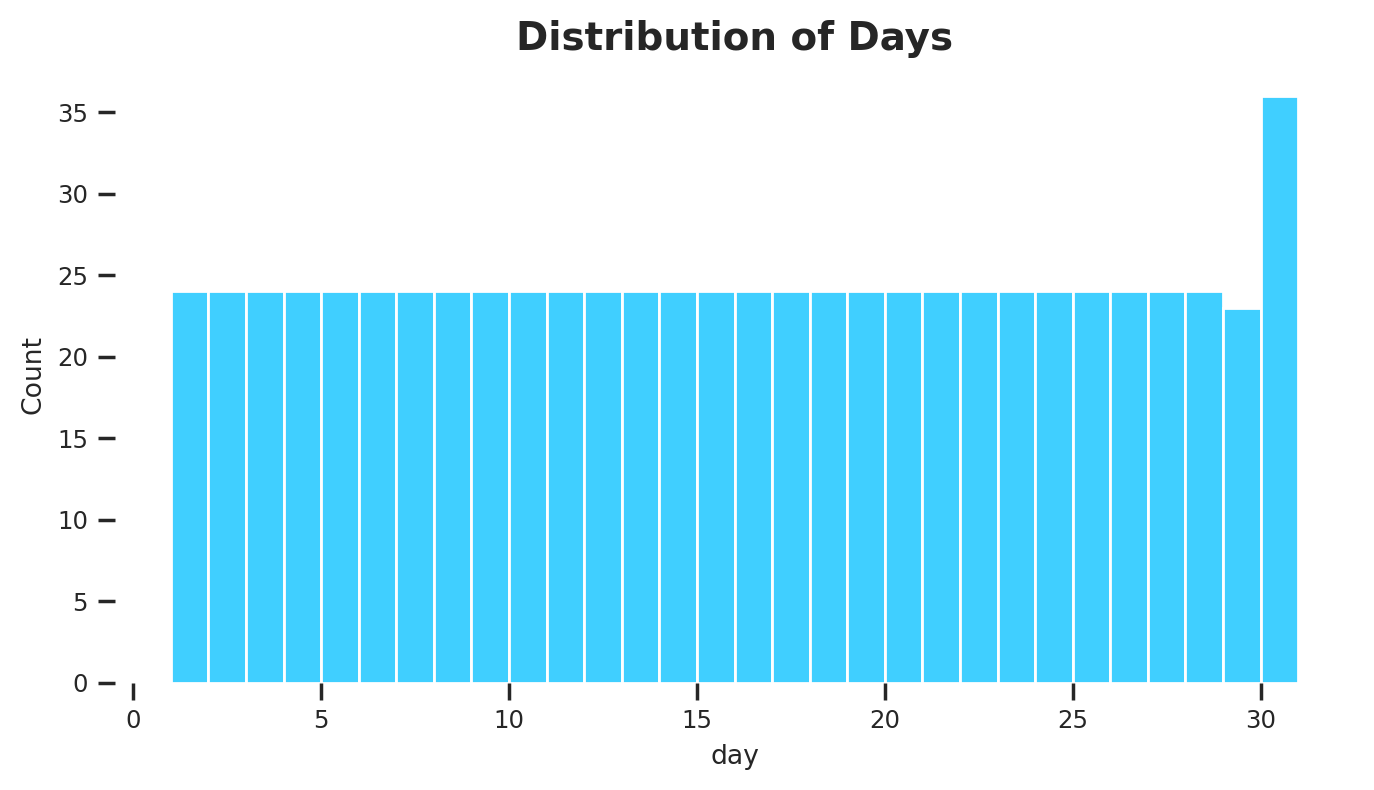

In [13]:
plt.figure(figsize=(8,4))
plt.title("Distribution of Days", fontsize=14, fontweight='bold')
ax = sns.histplot(data=df, x='day', binwidth=1);

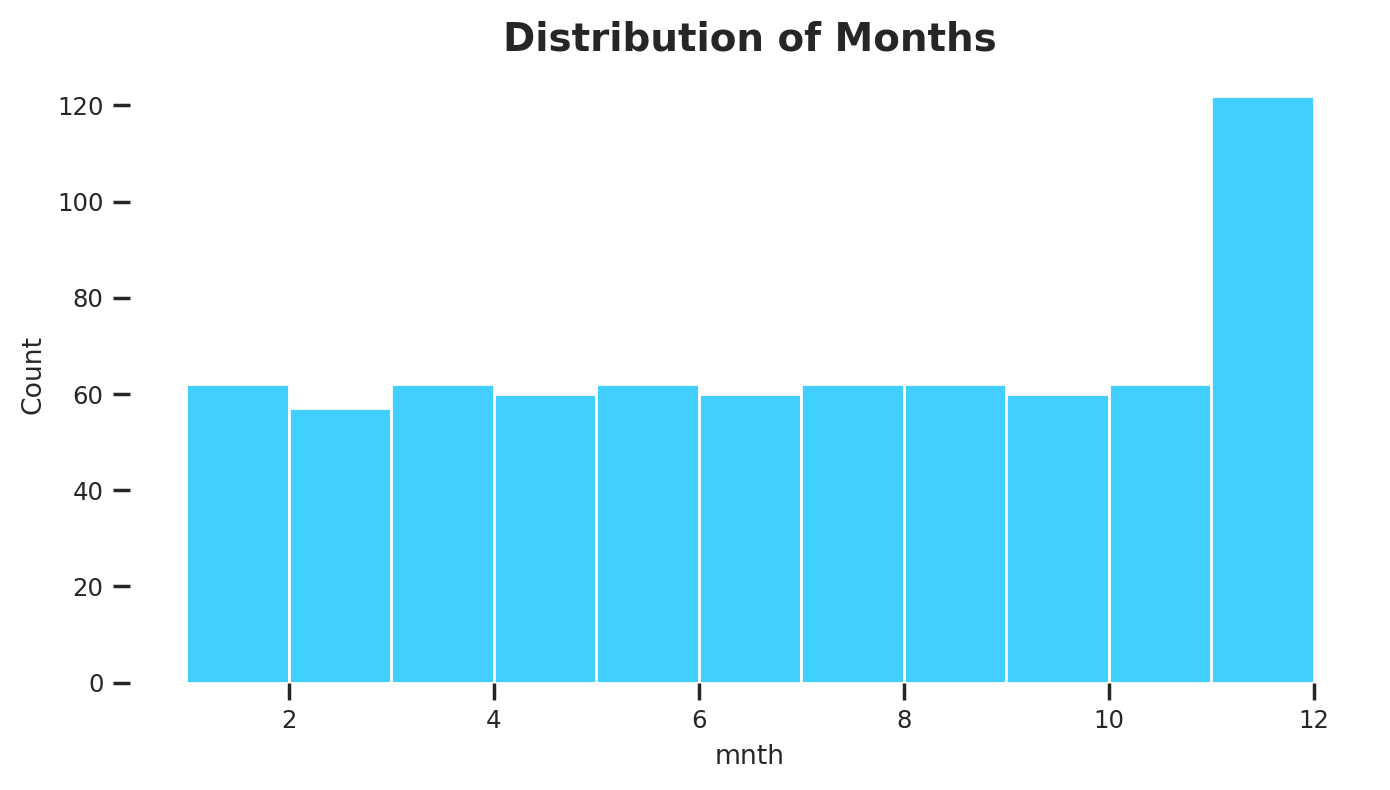

In [14]:
plt.figure(figsize=(8,4))
plt.title("Distribution of Months", fontsize=14, fontweight='bold')
ax = sns.histplot(data=df, x='mnth', binwidth=1);

In [15]:
df.shape

(731, 13)

In [17]:
df.head()

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [18]:
list(df.columns)

['day',
 'mnth',
 'year',
 'season',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'rentals']

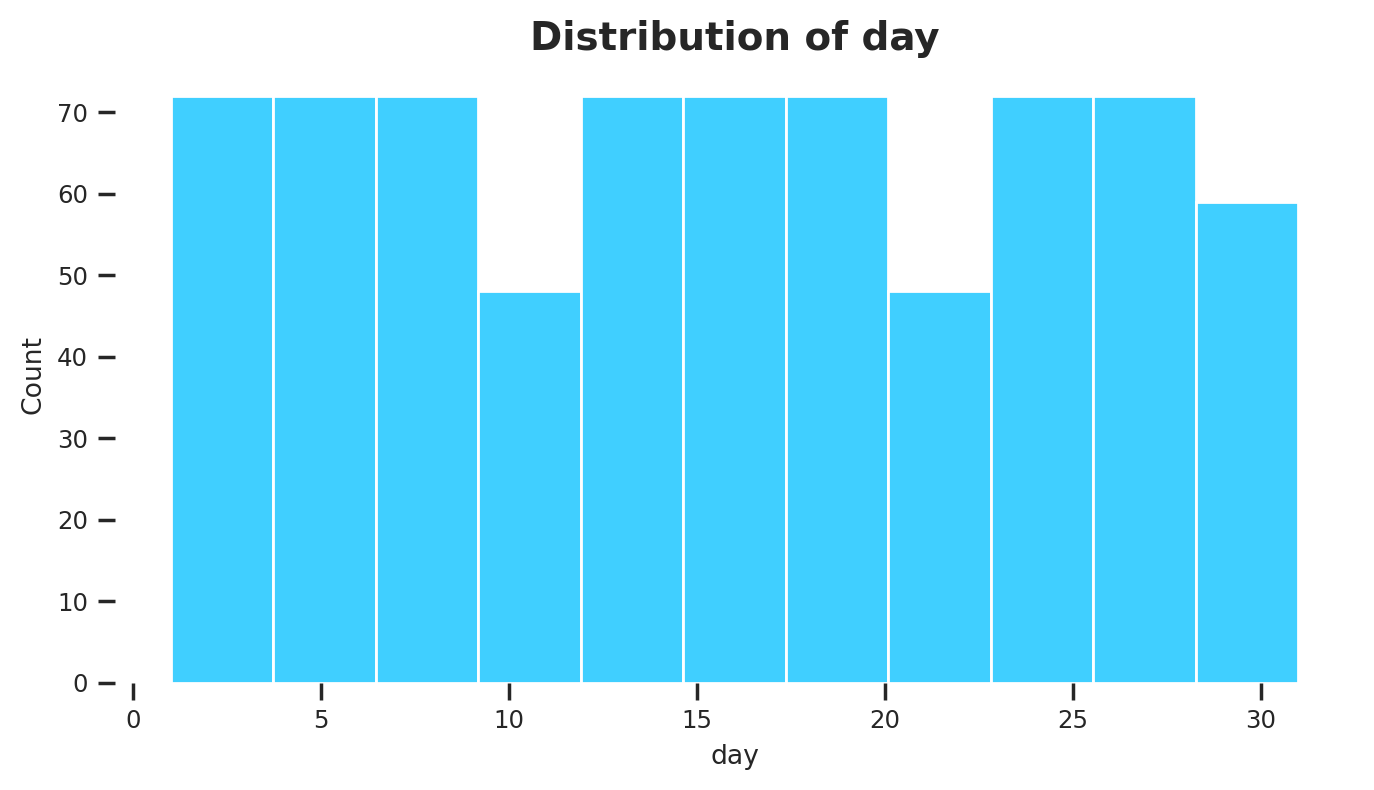

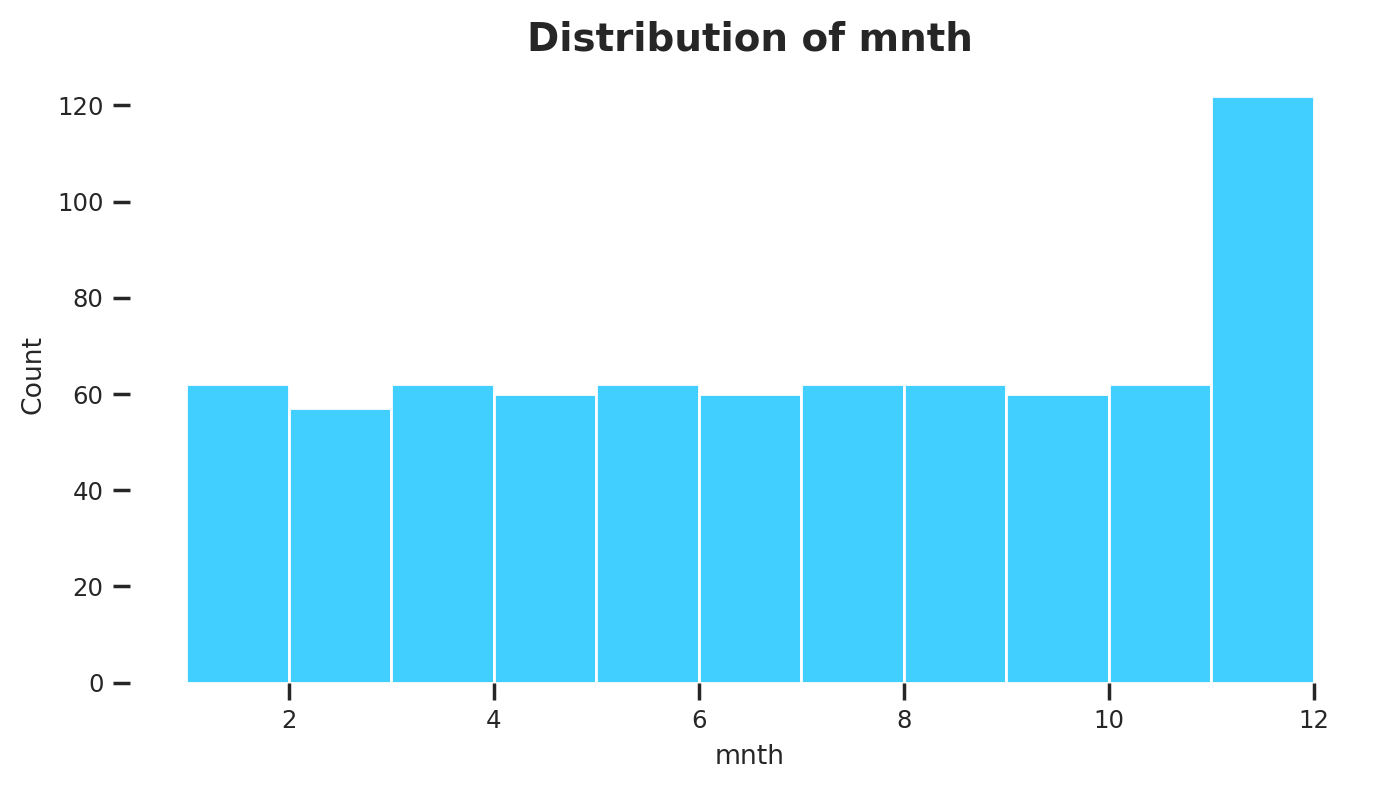

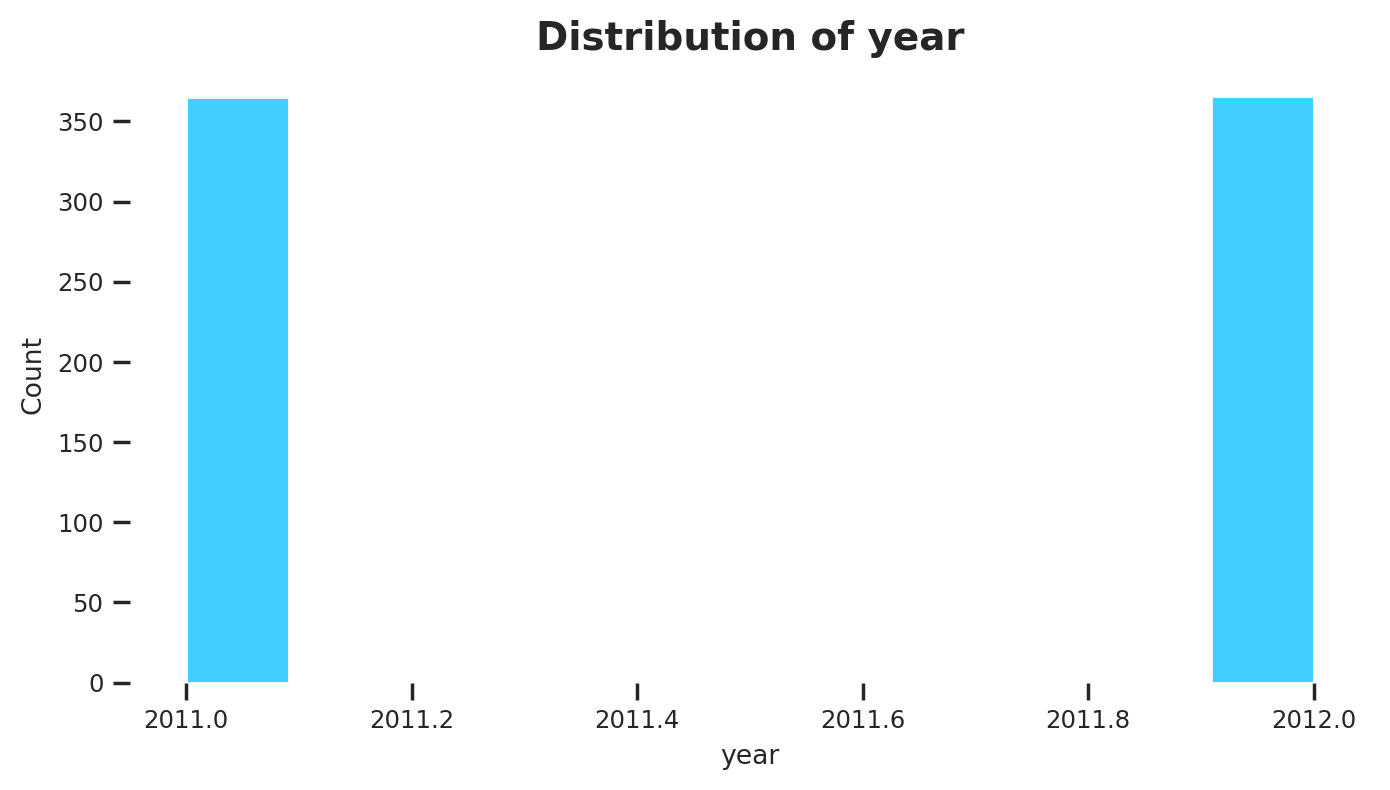

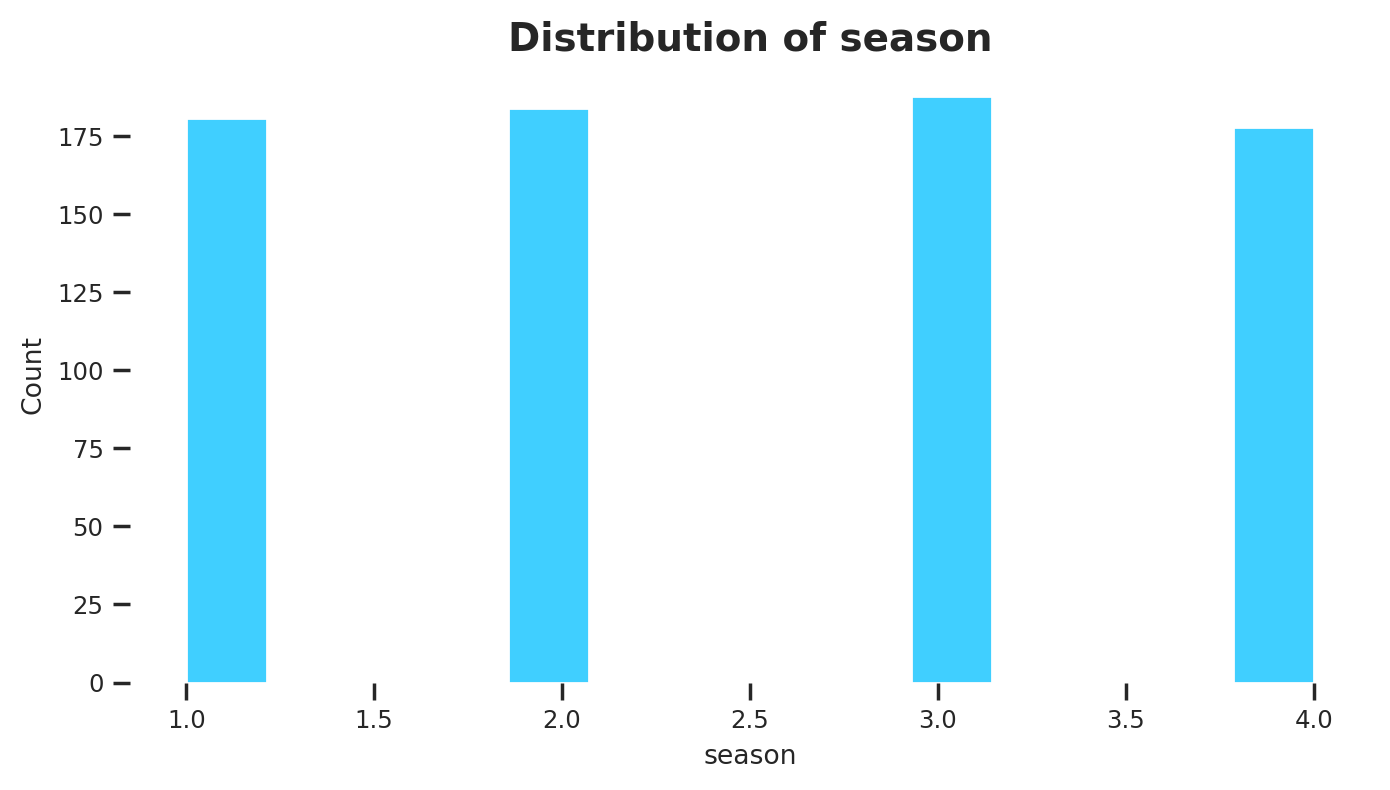

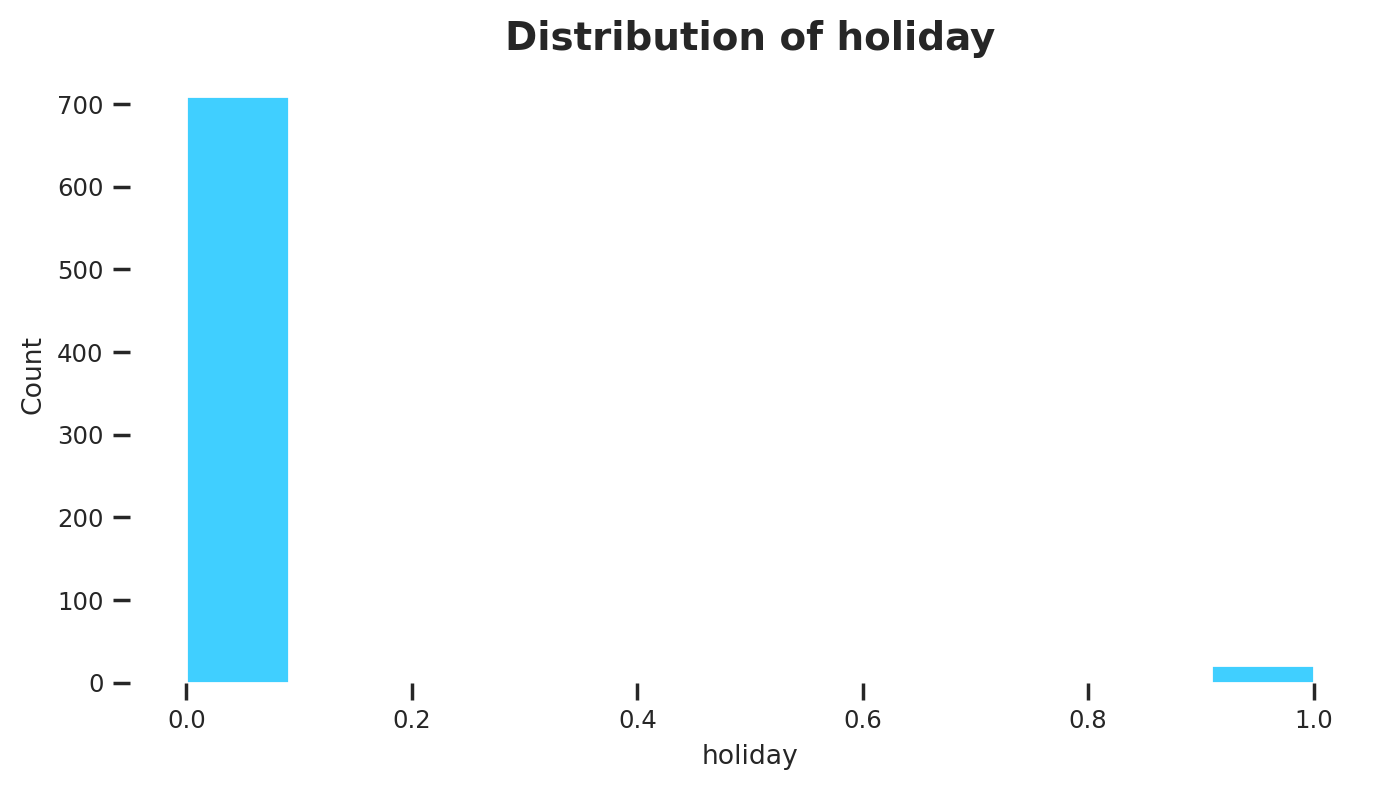

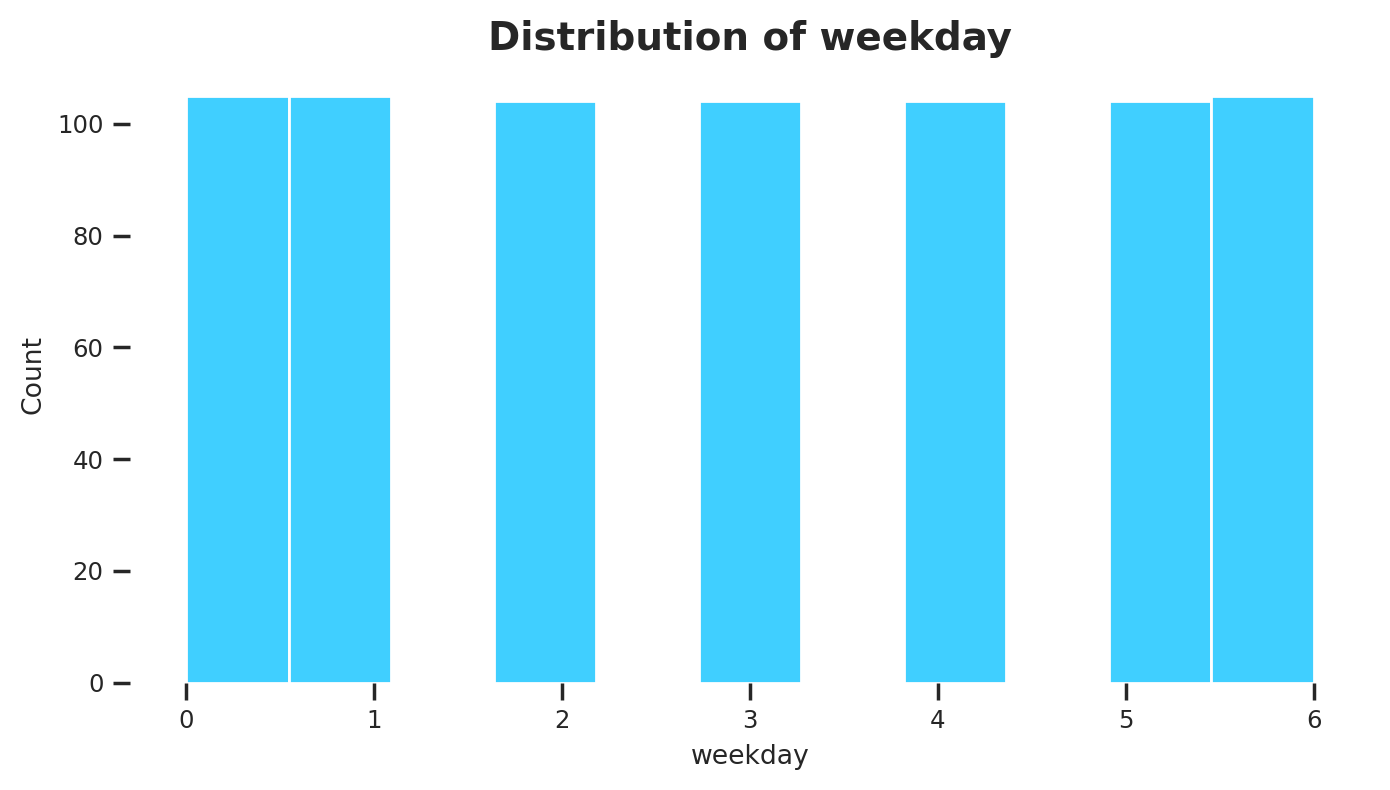

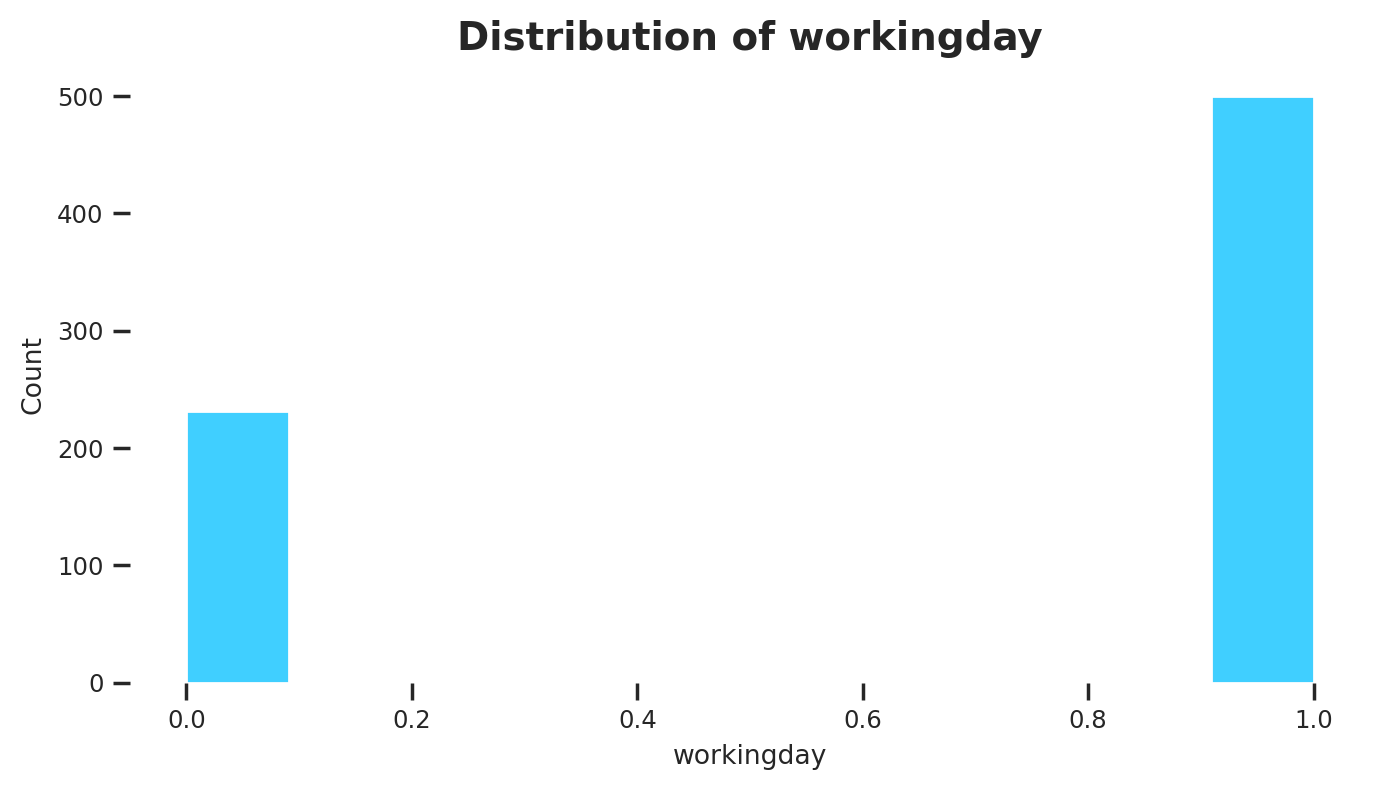

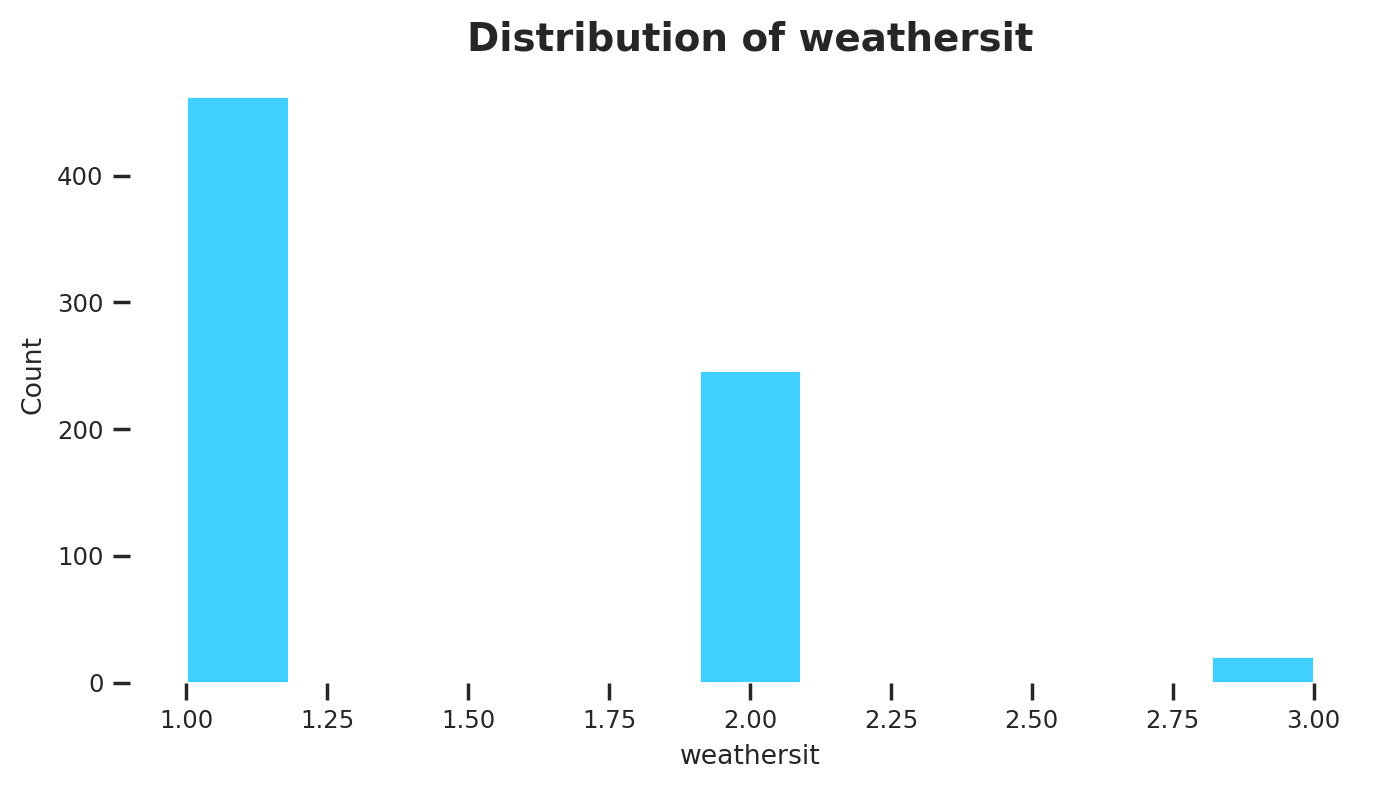

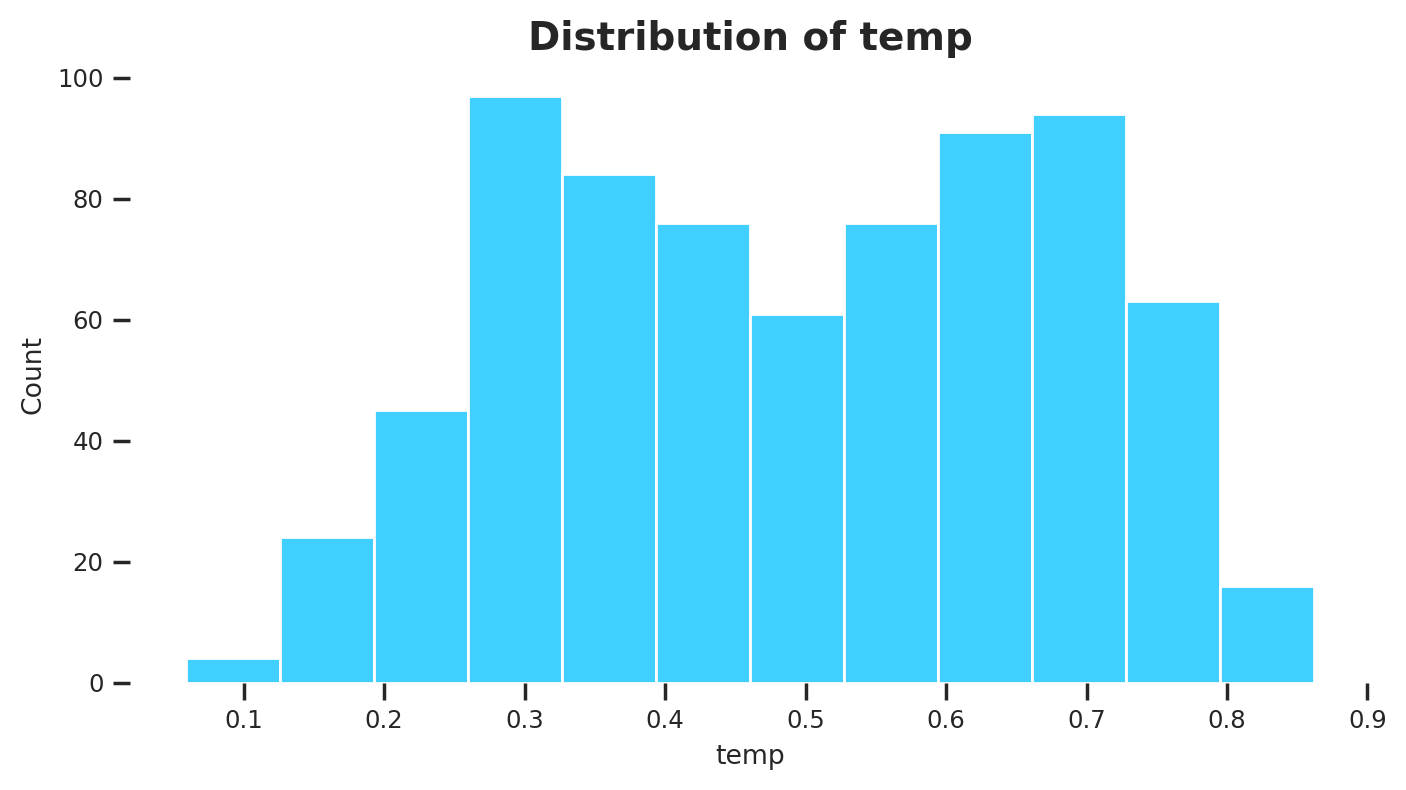

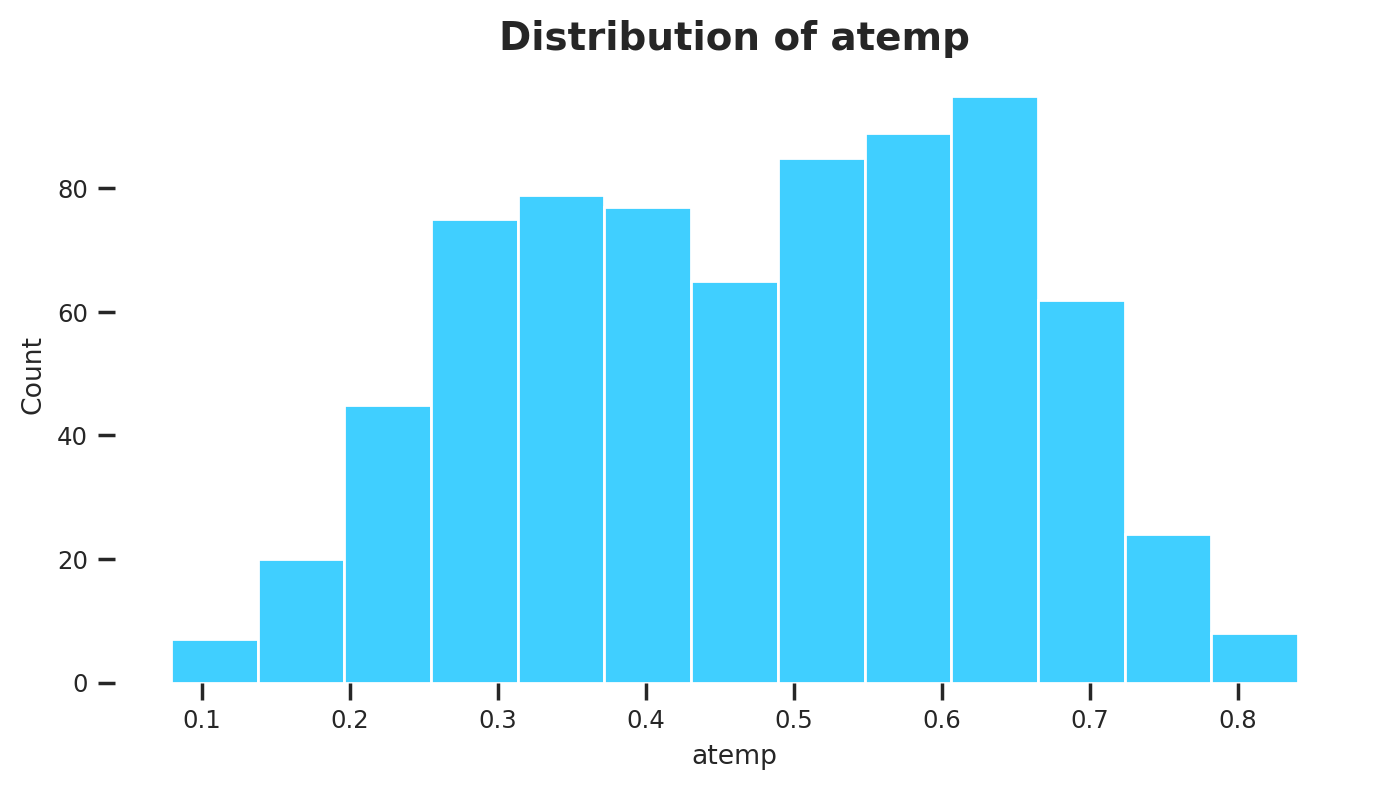

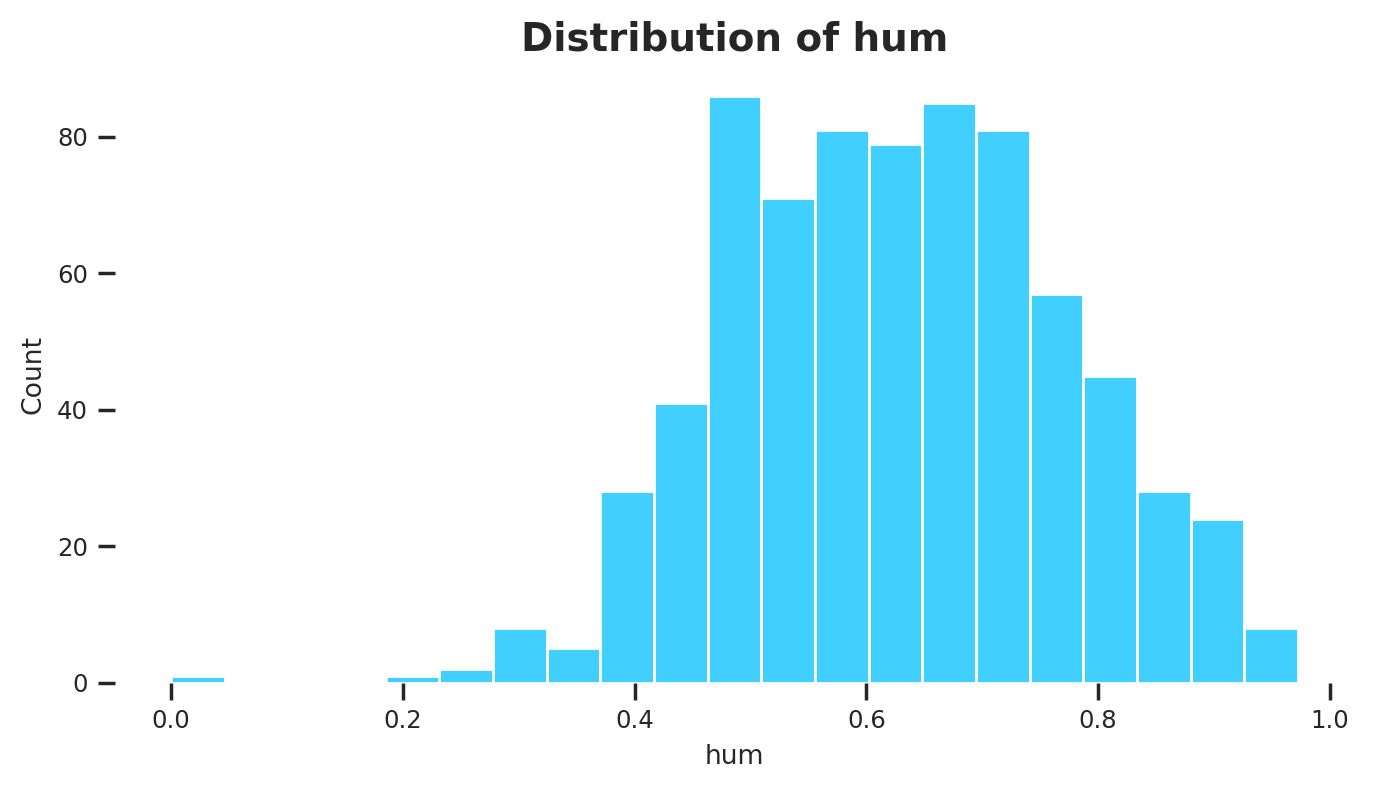

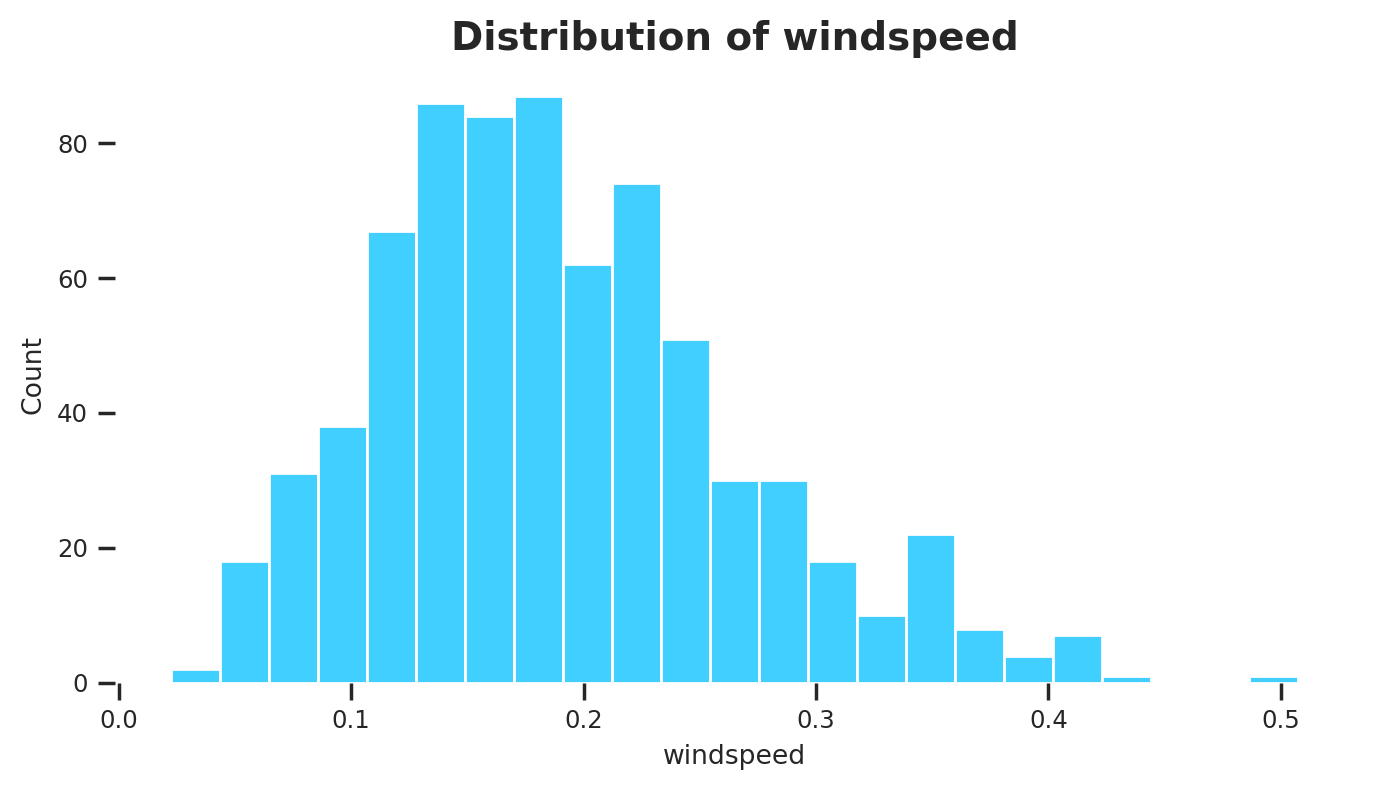

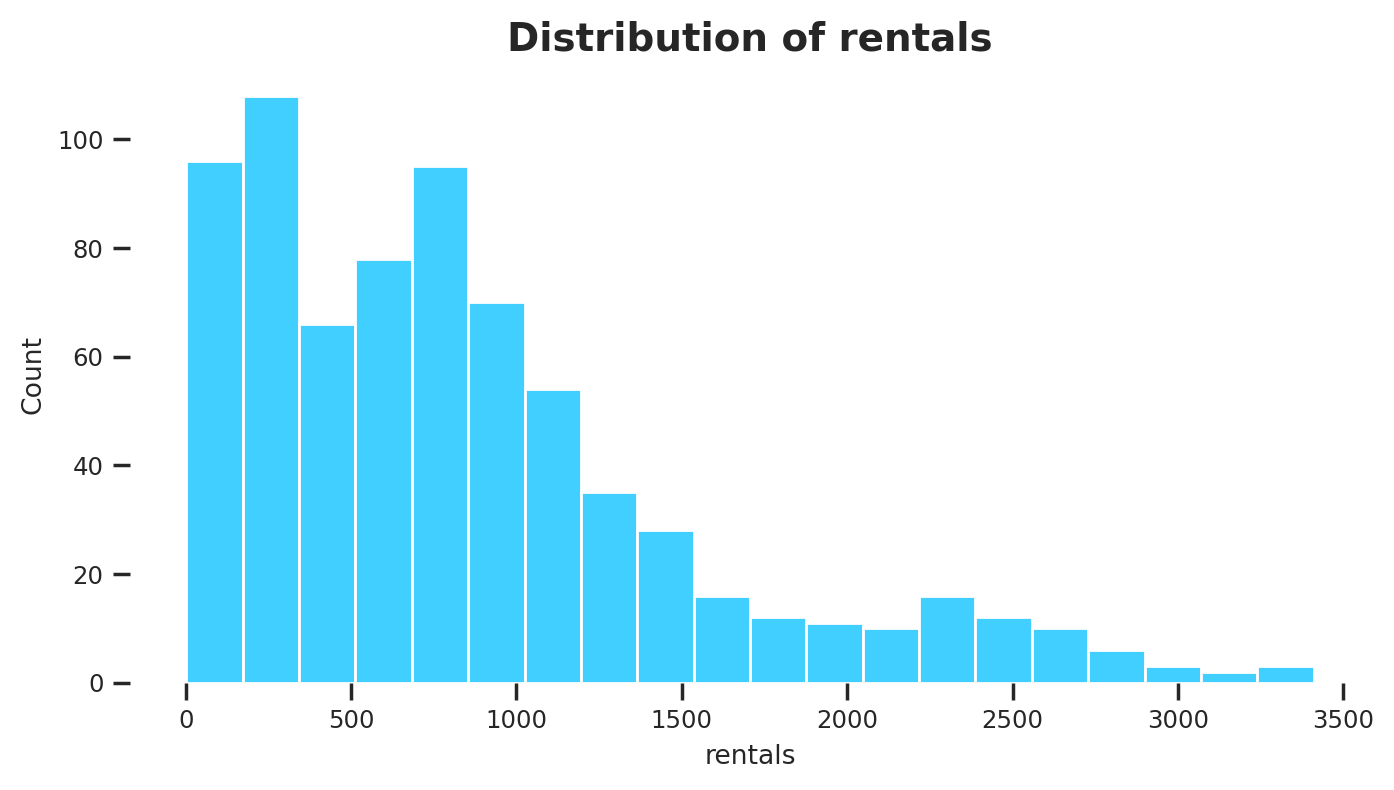

In [21]:
for column in df.columns:
    plt.figure(figsize=(8,4))
    plt.title(f"Distribution of {column}", fontsize=14, fontweight='bold')
    ax = sns.histplot(data=df, x=column);

## Box Plots

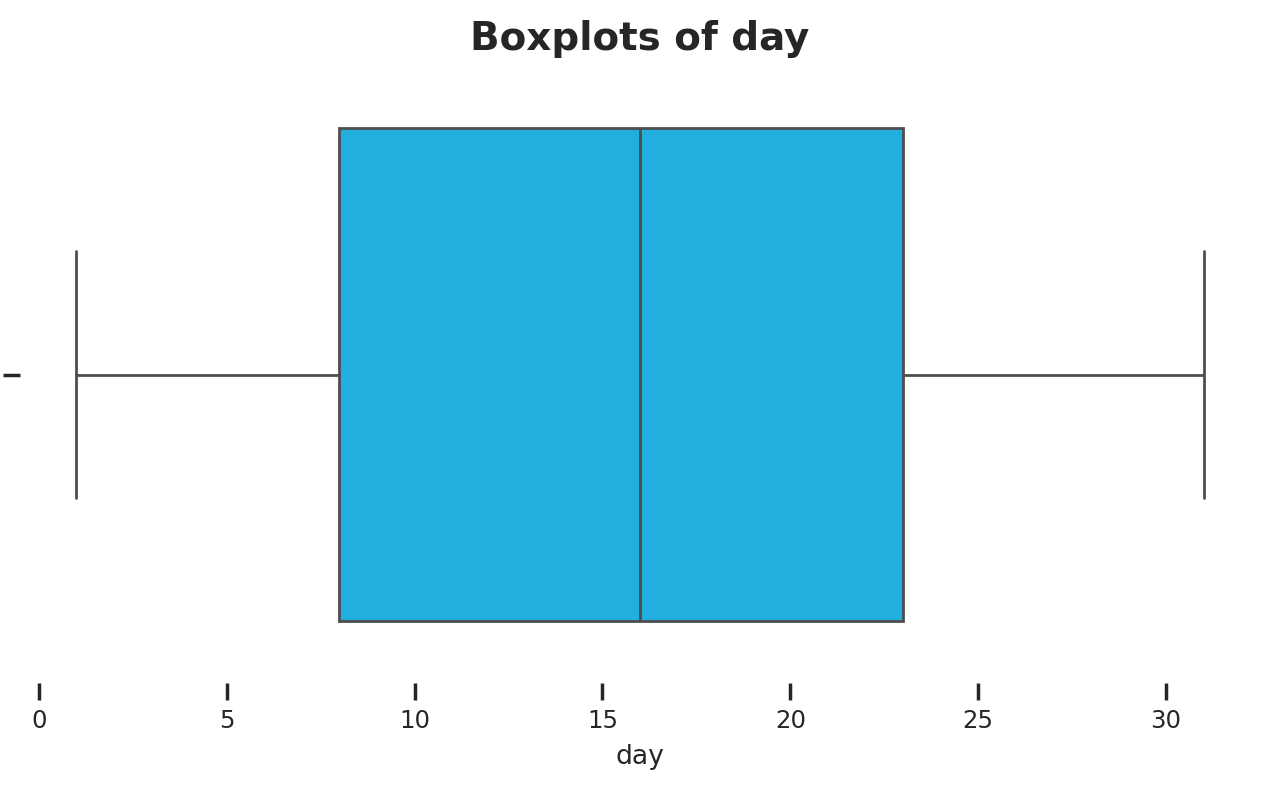

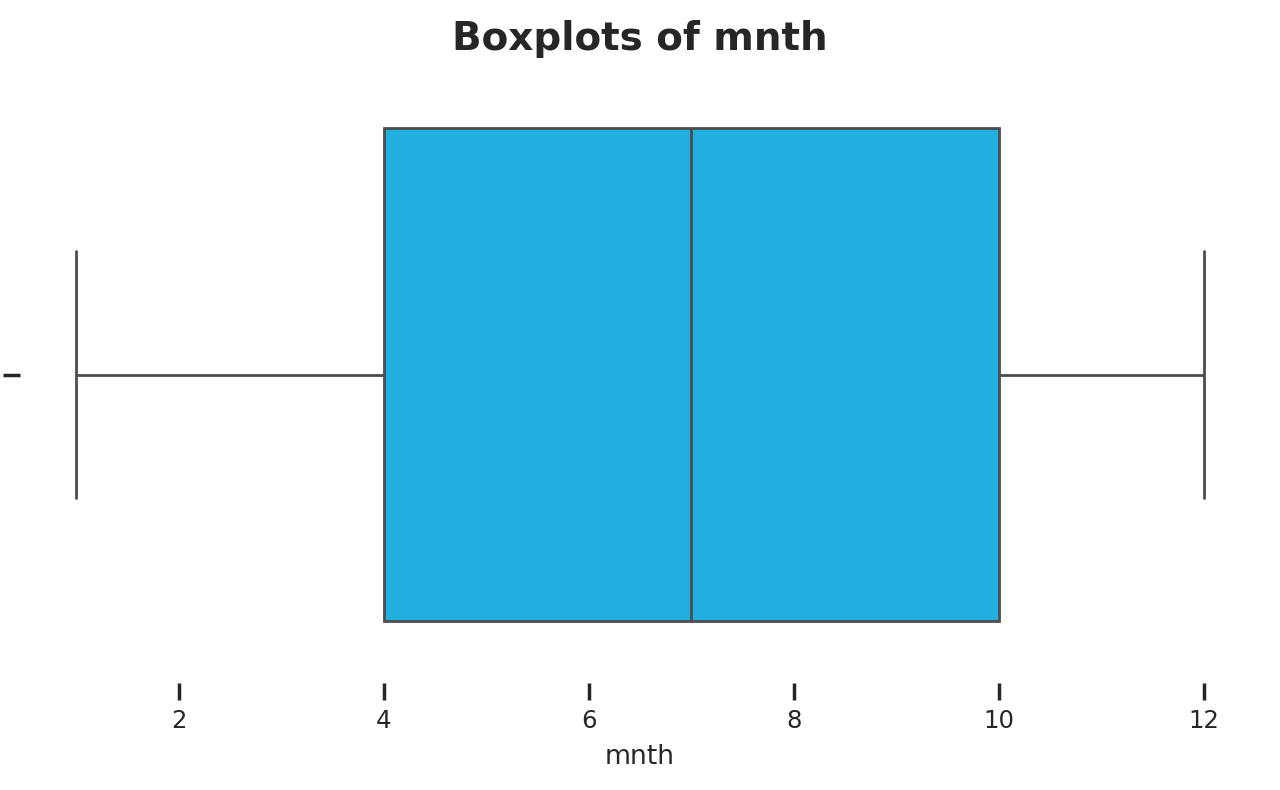

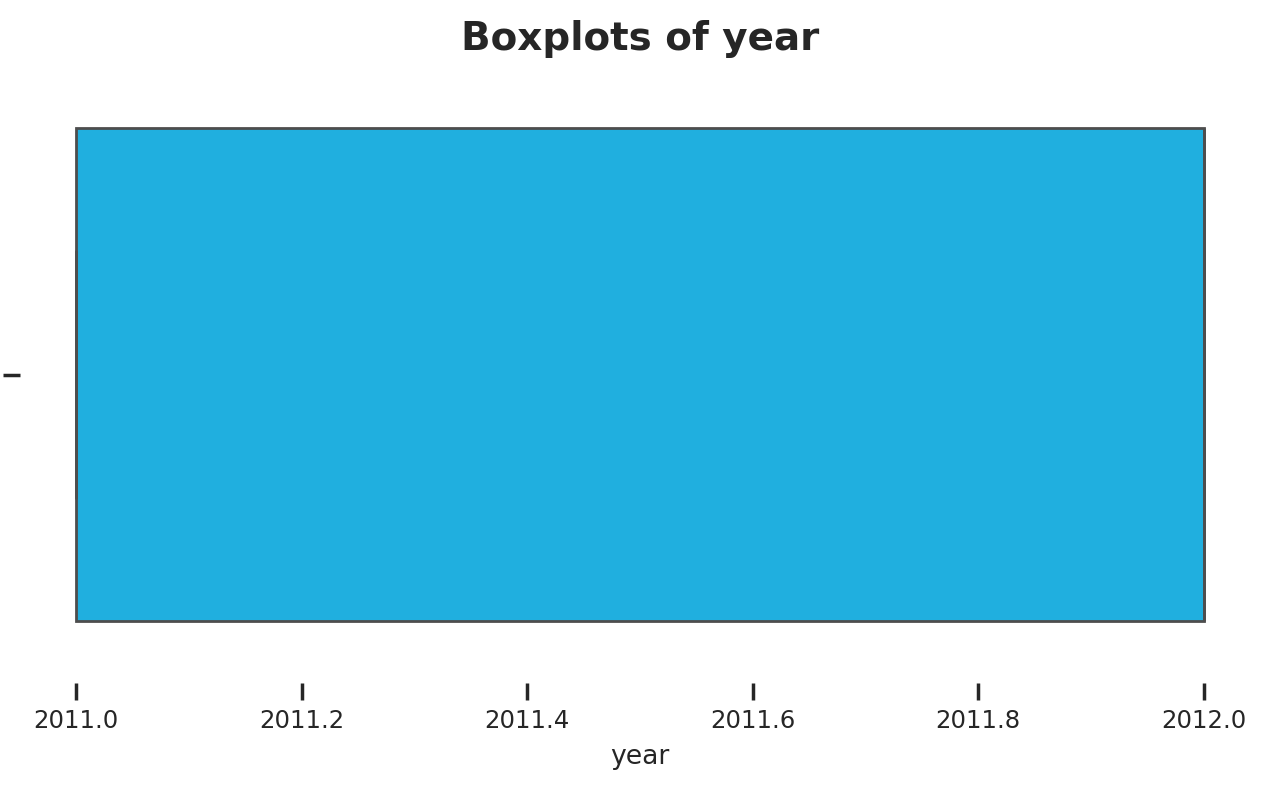

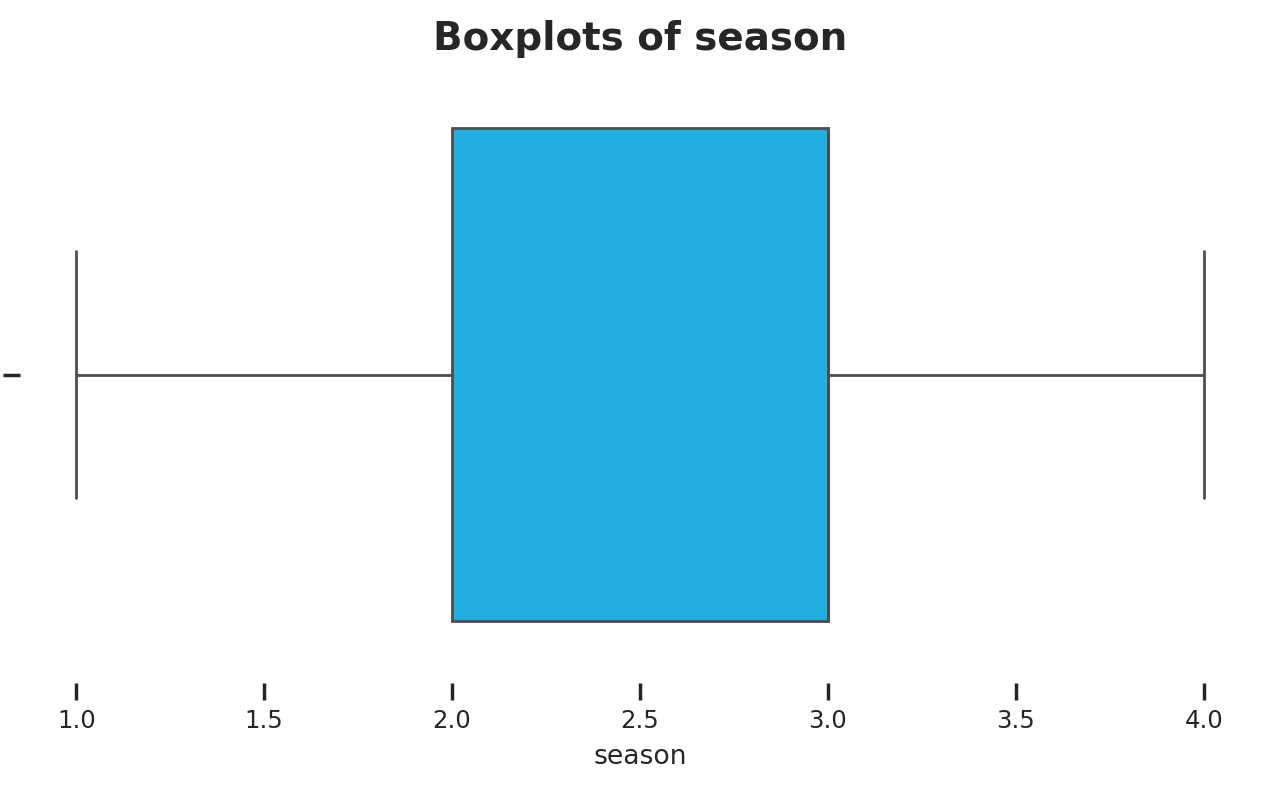

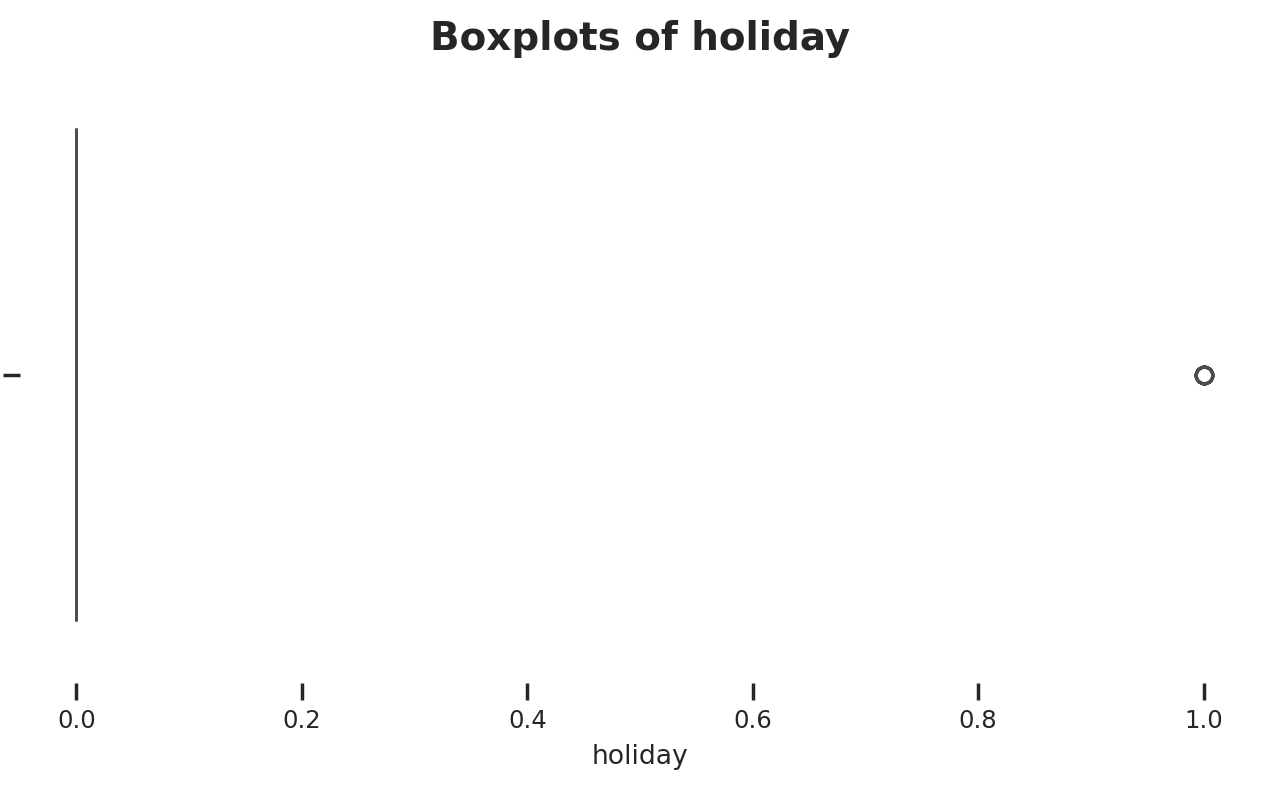

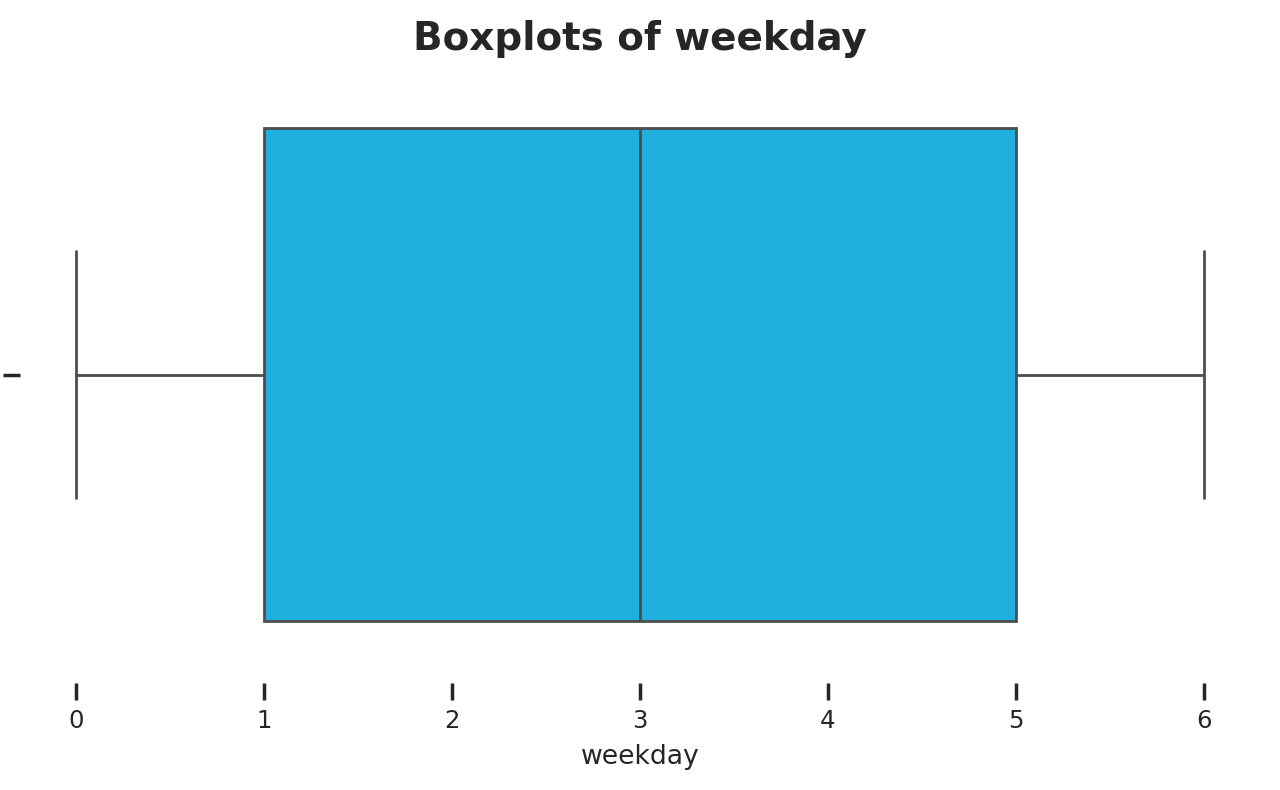

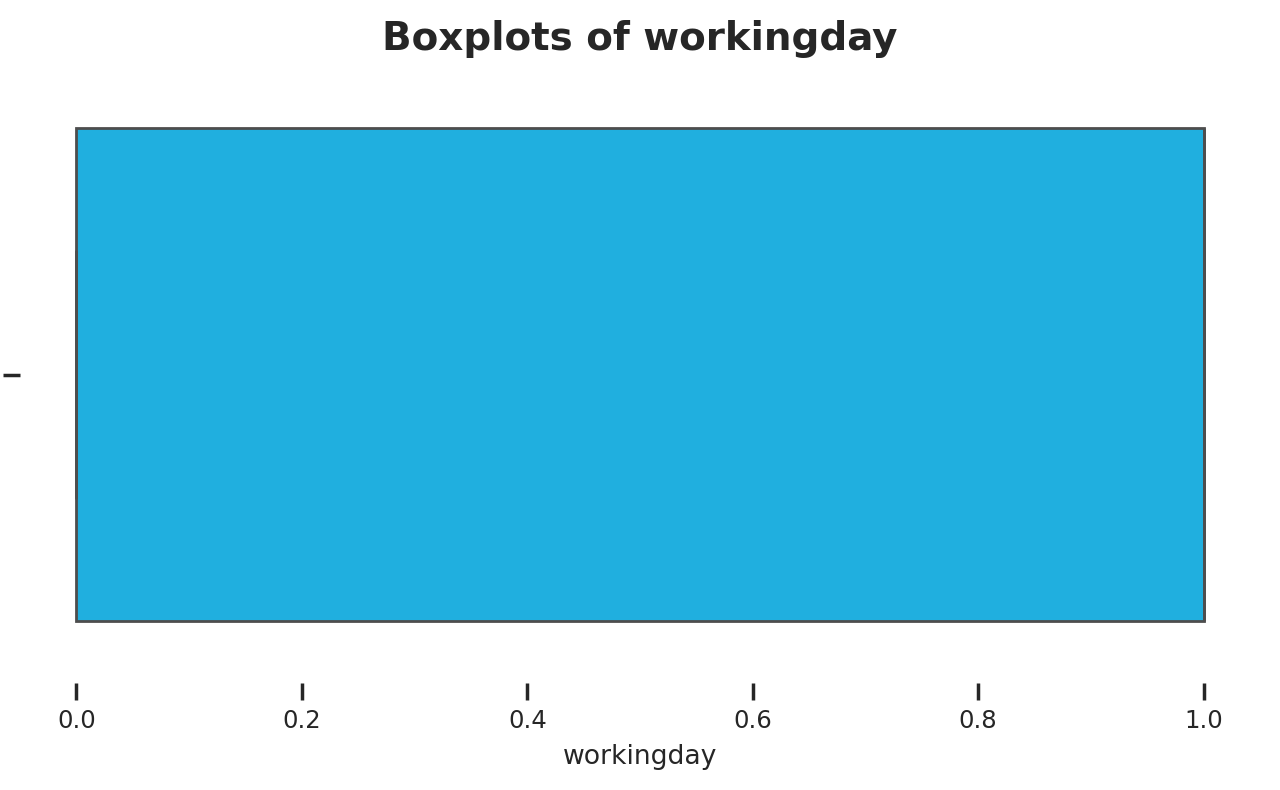

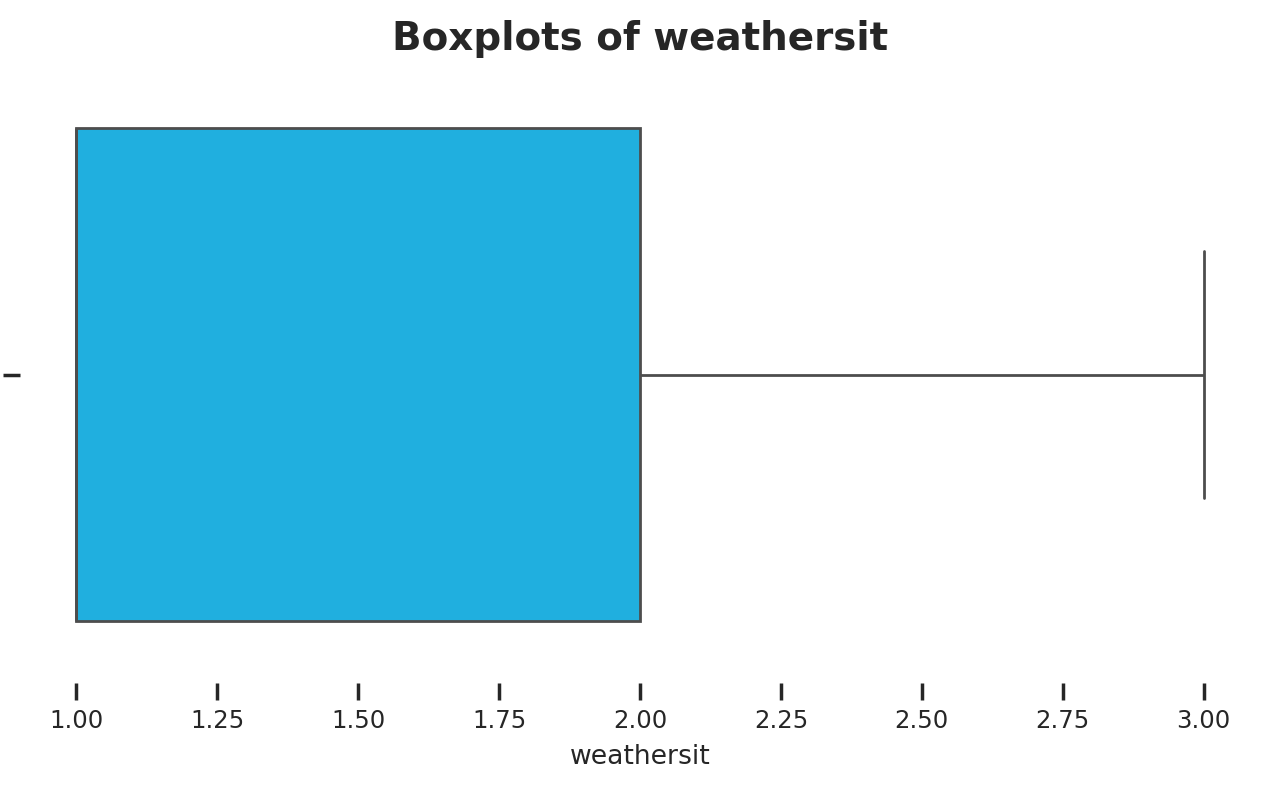

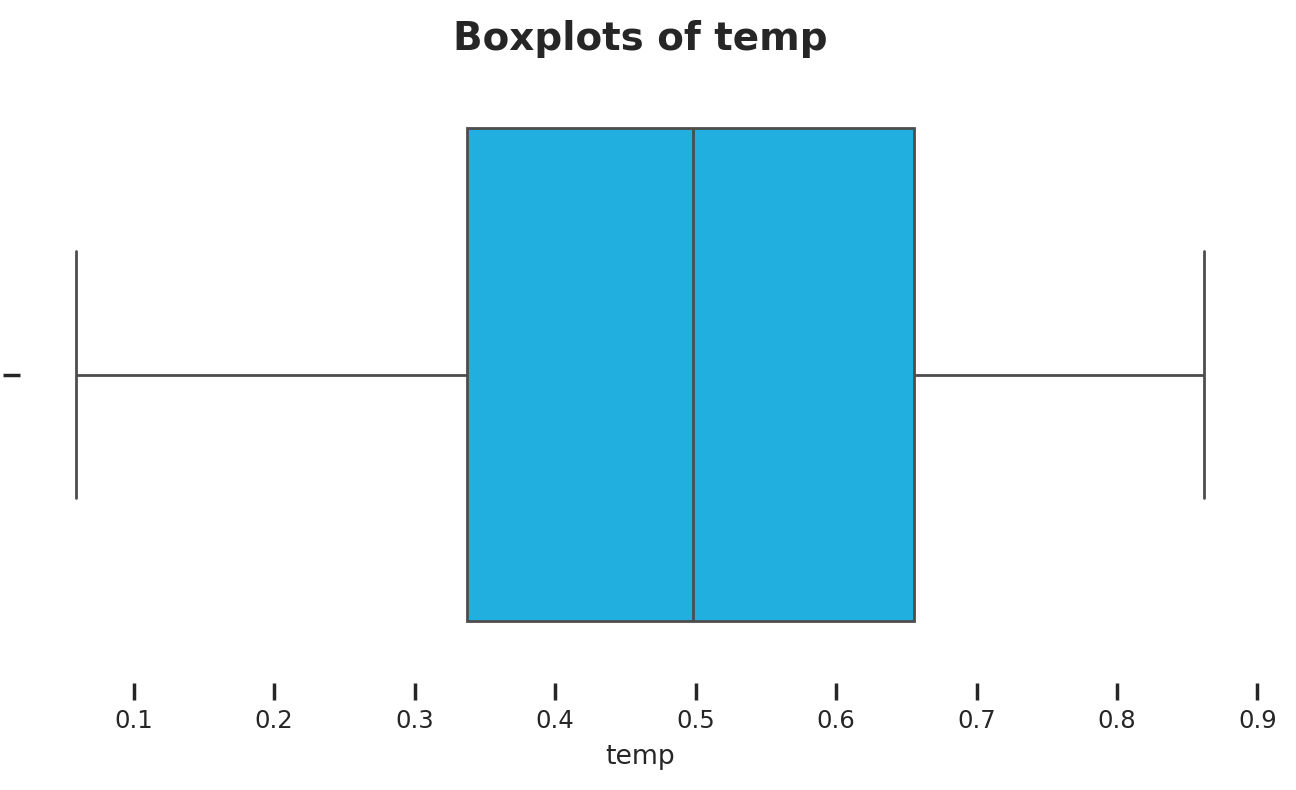

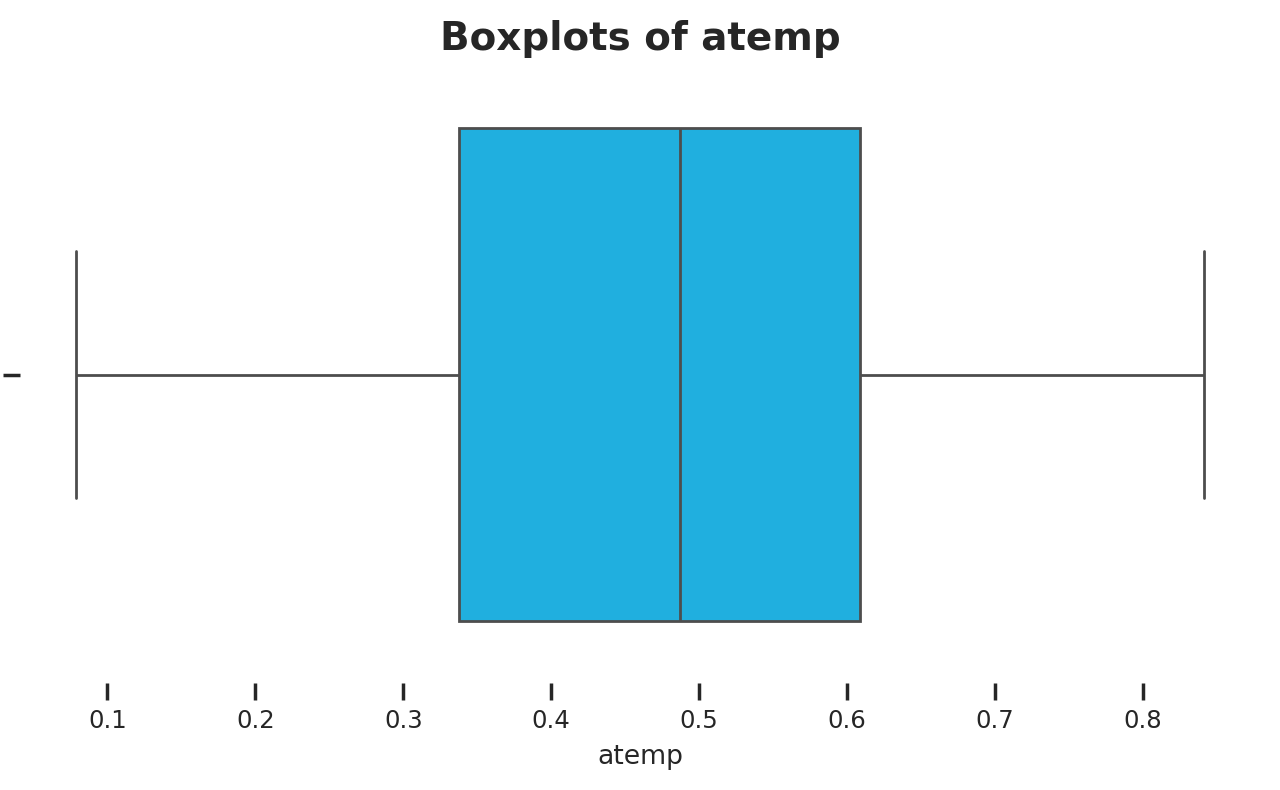

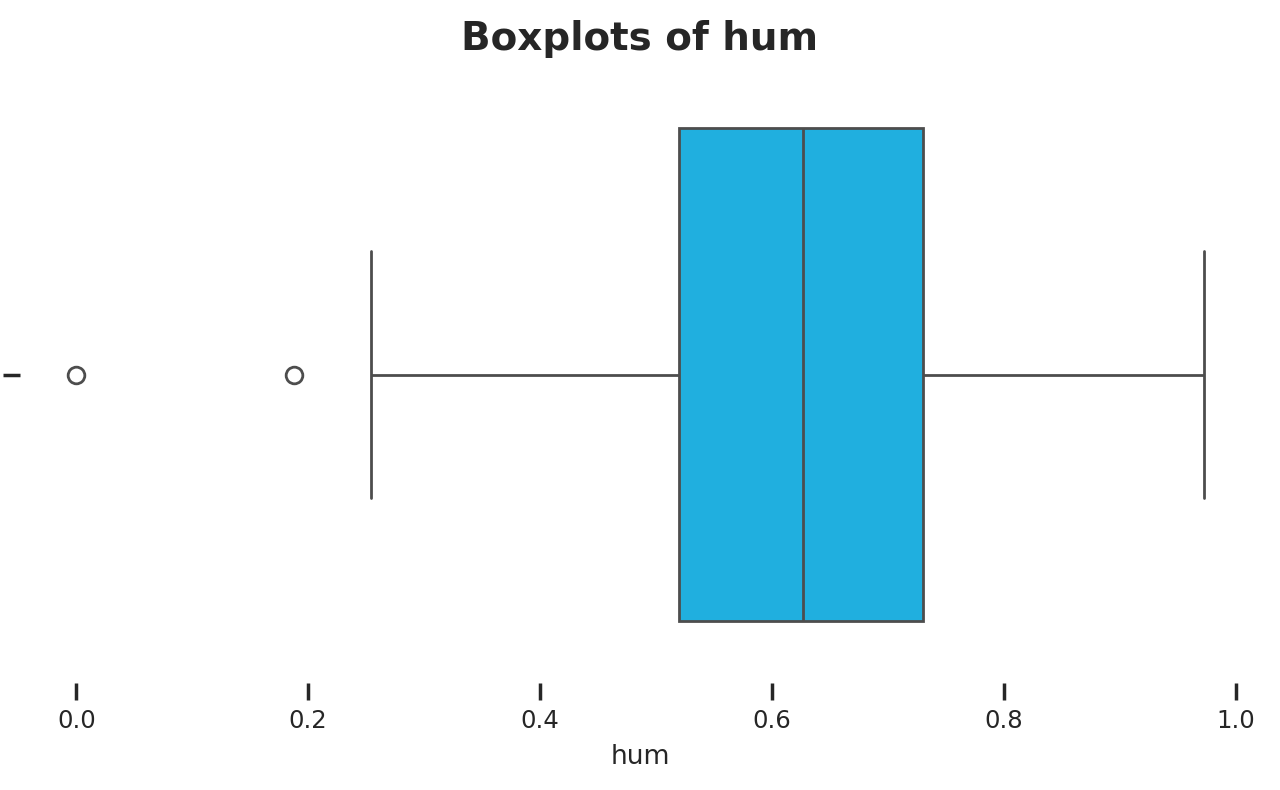

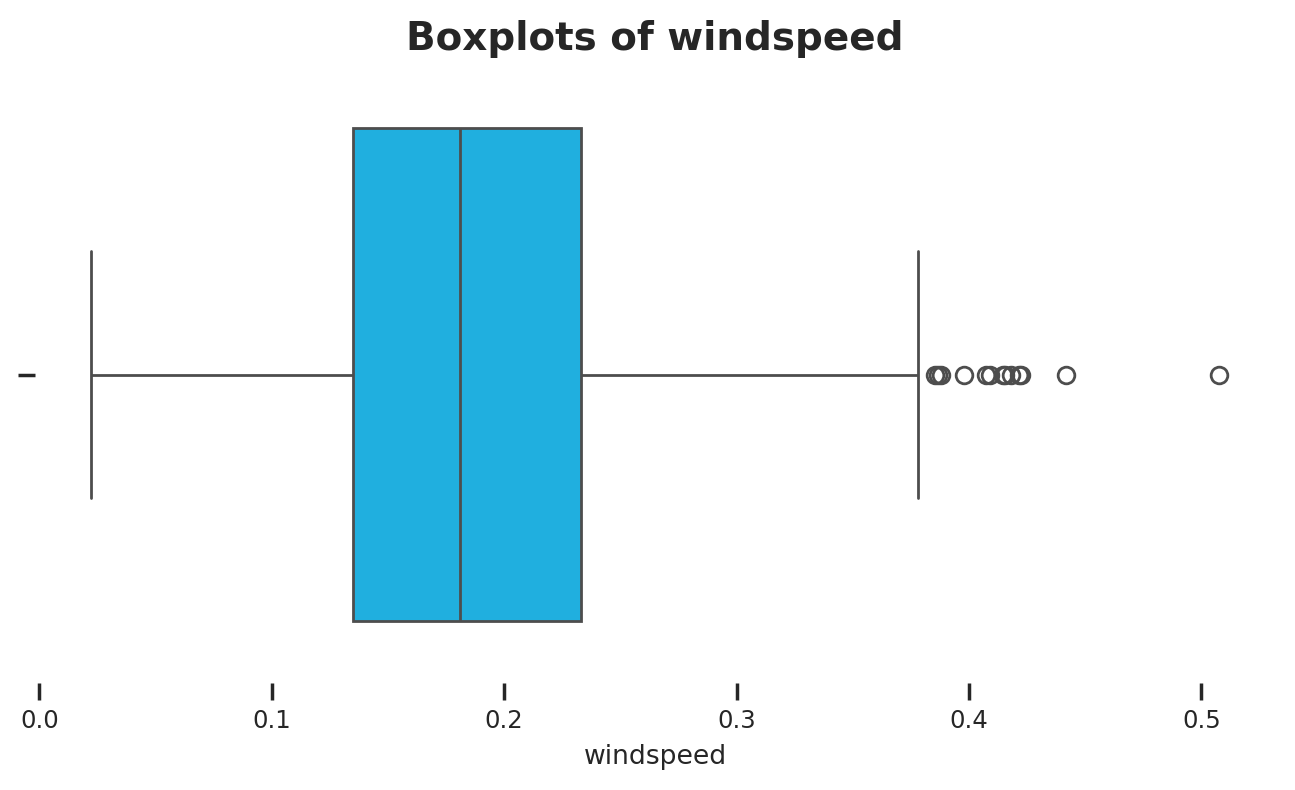

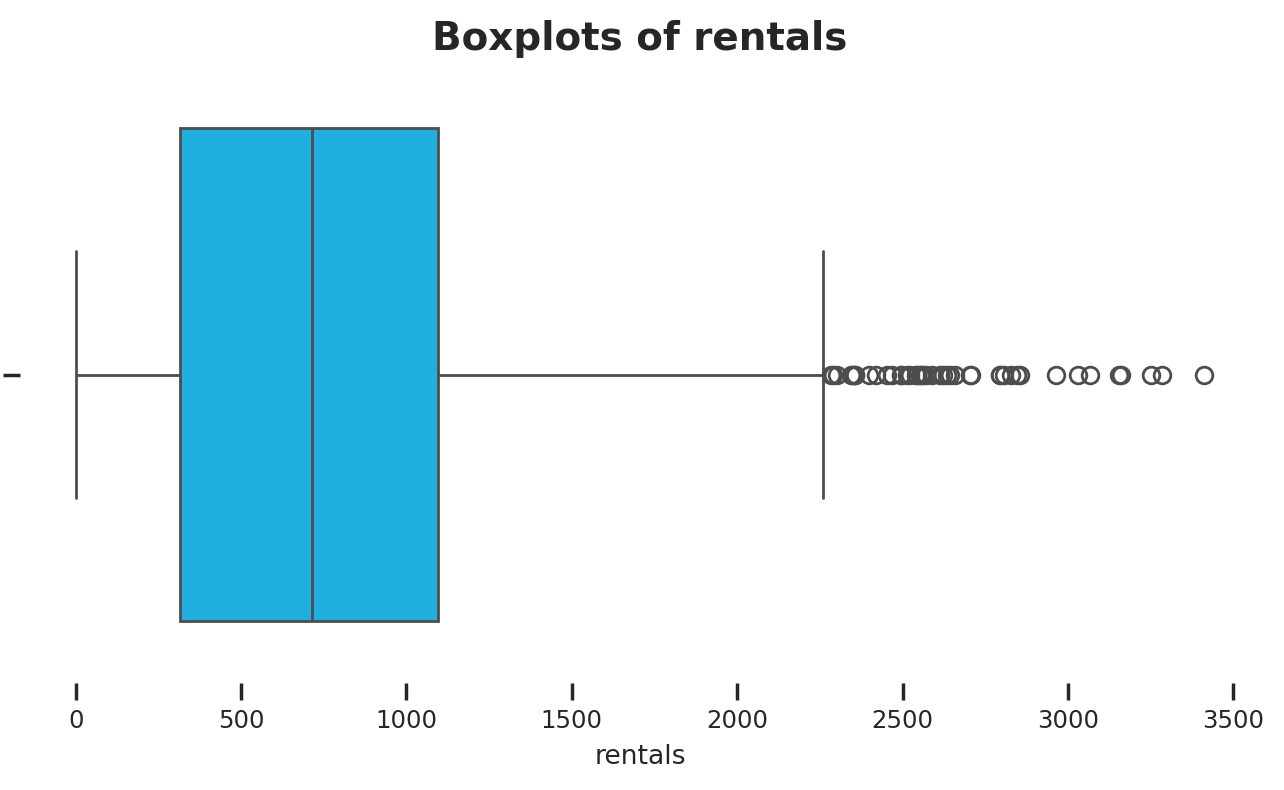

In [22]:
for column in df.columns:
    plt.figure(figsize=(8,4))
    plt.title(f"Boxplots of {column}", fontsize=14, fontweight='bold')
    ax = sns.boxplot(data=df, x=column, orient='h');

## Scatter Plots
Relationship between variables

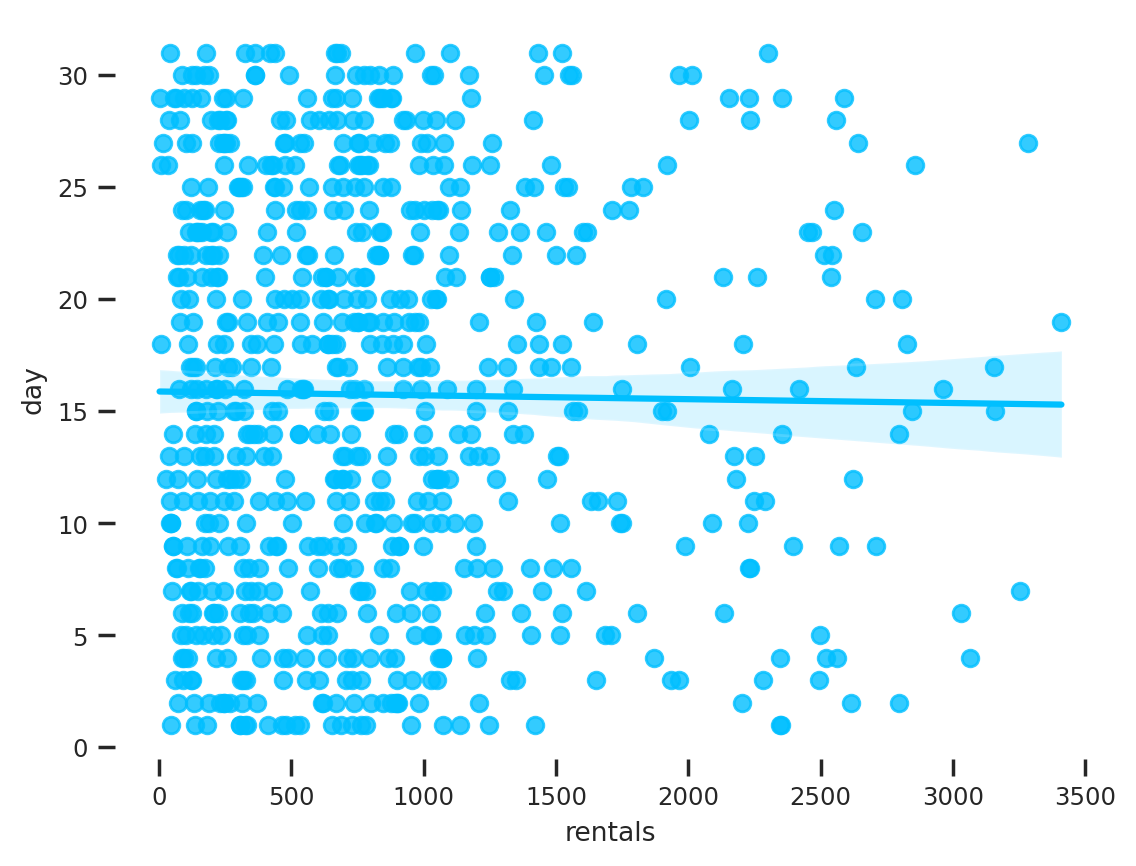

In [23]:
ax = sns.regplot(data=df, x="rentals", y="day");

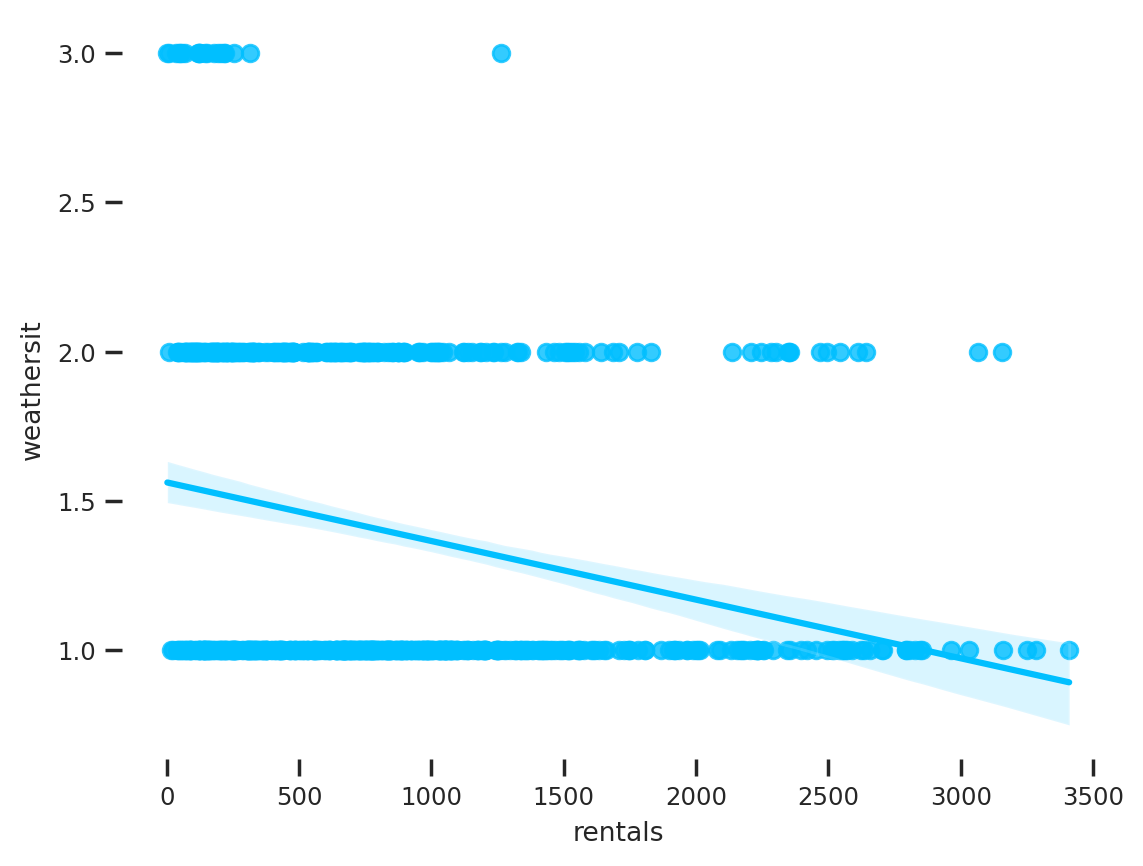

In [24]:
ax = sns.regplot(data=df, x="rentals", y="weathersit");

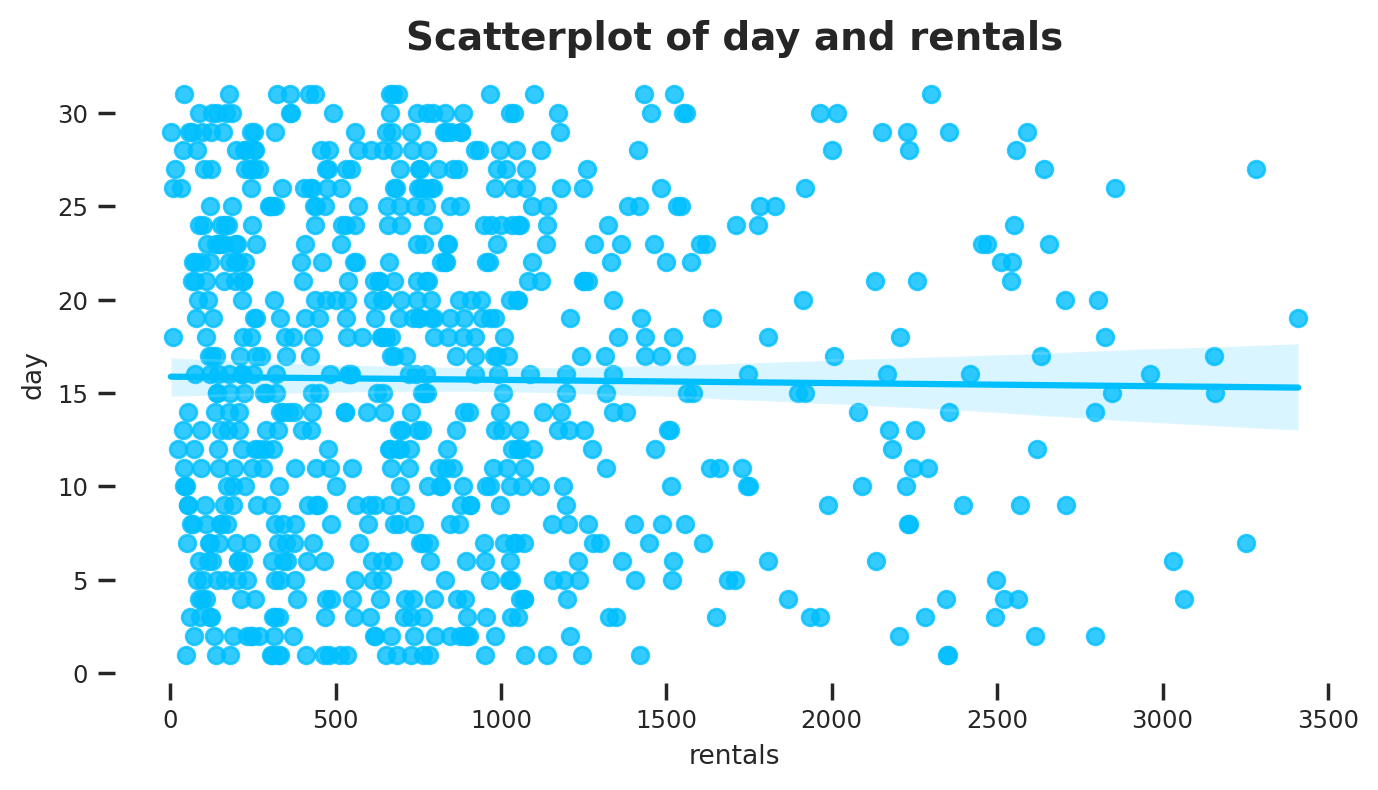

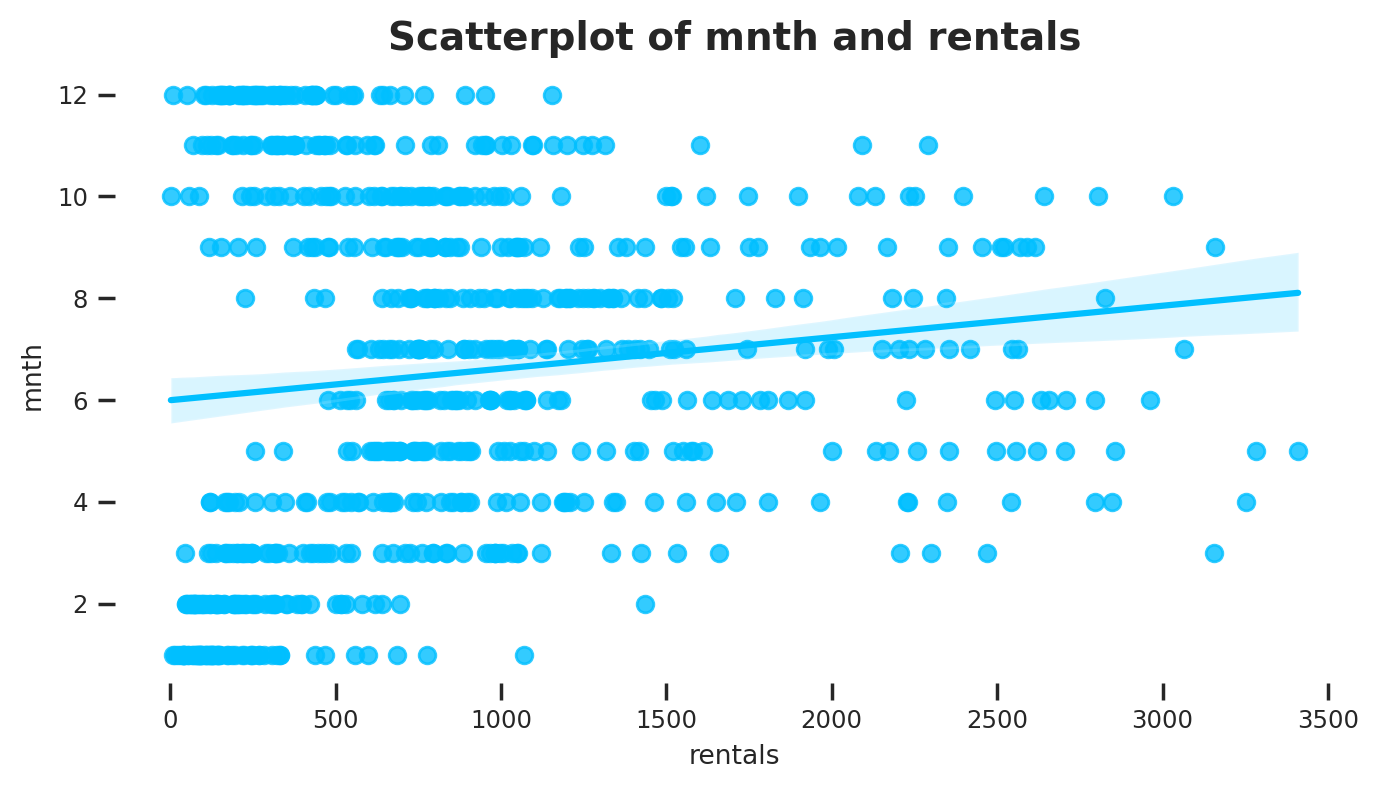

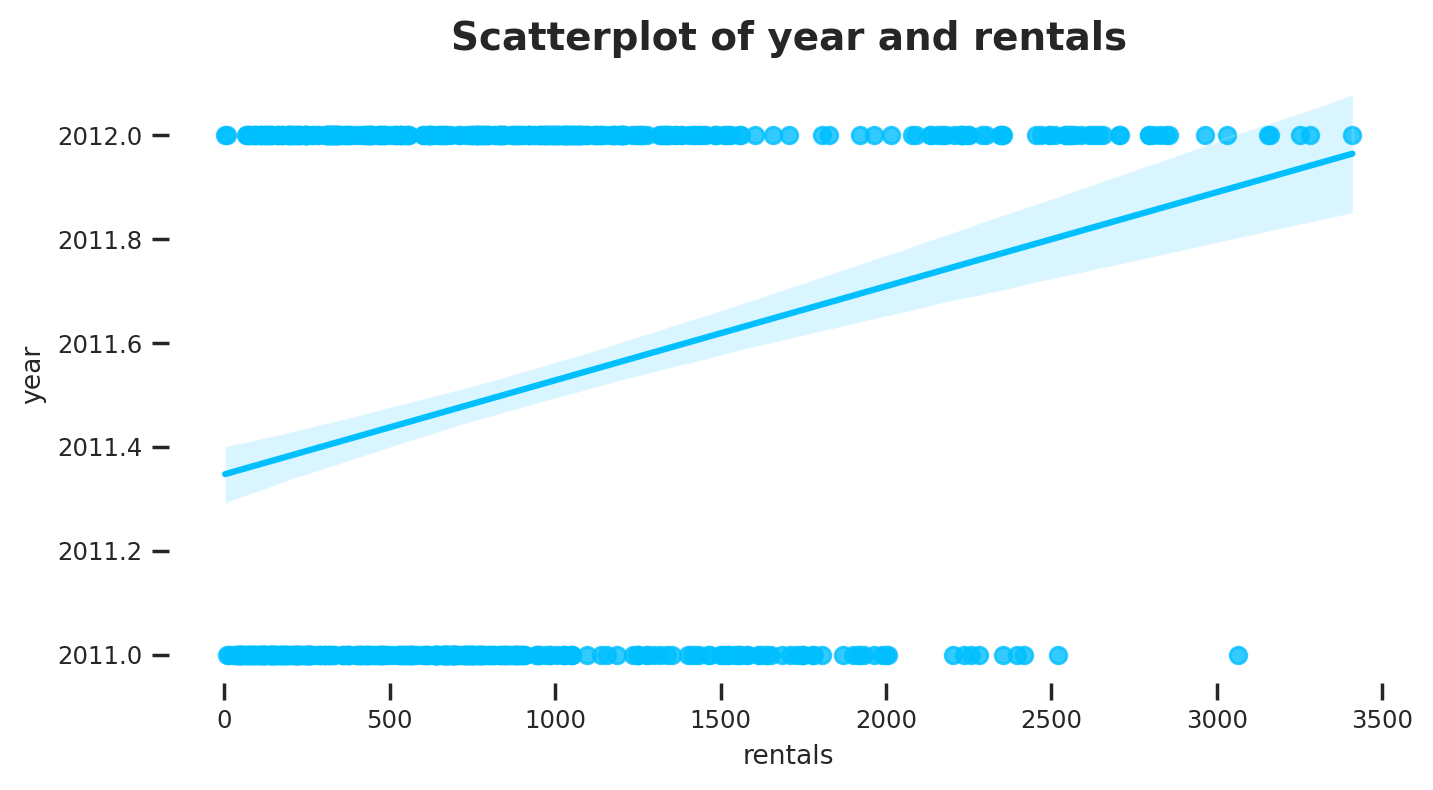

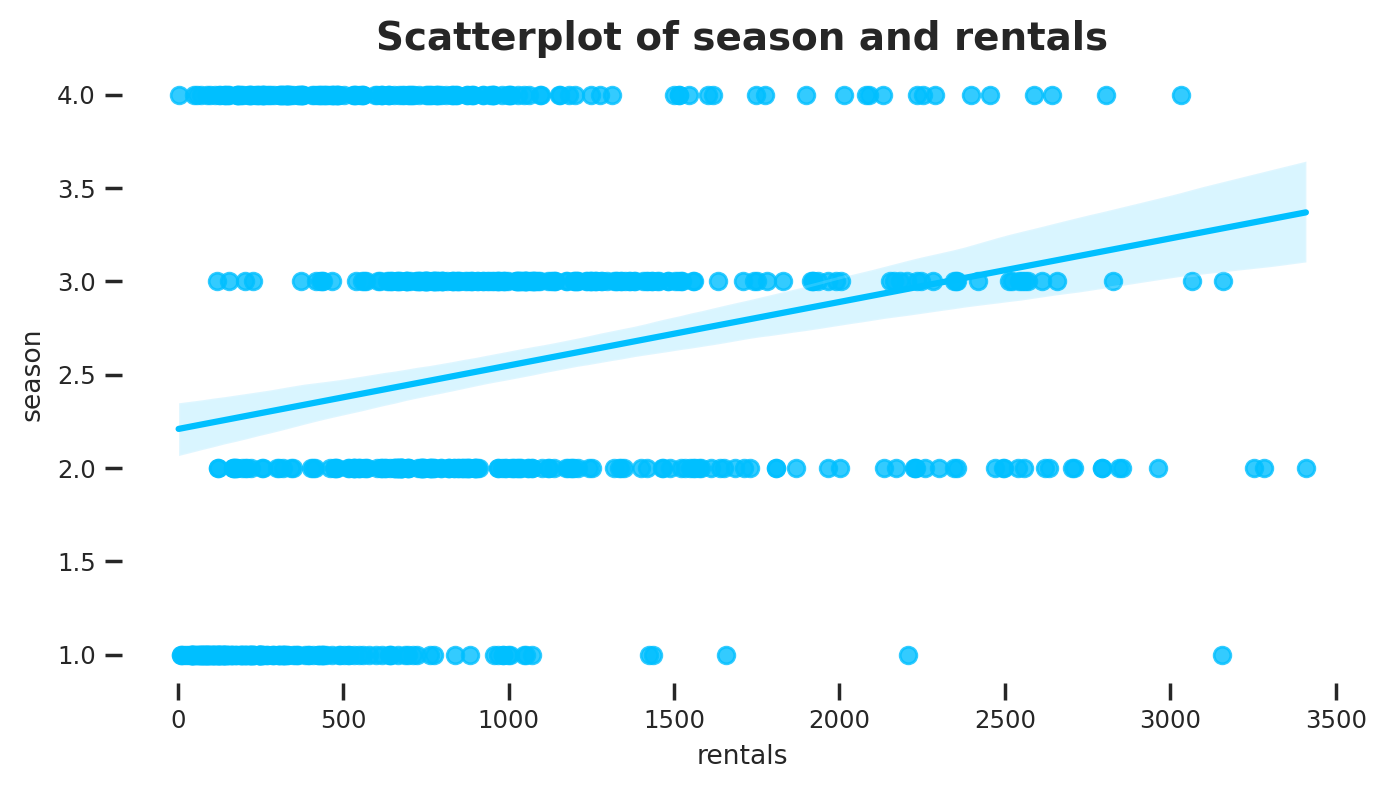

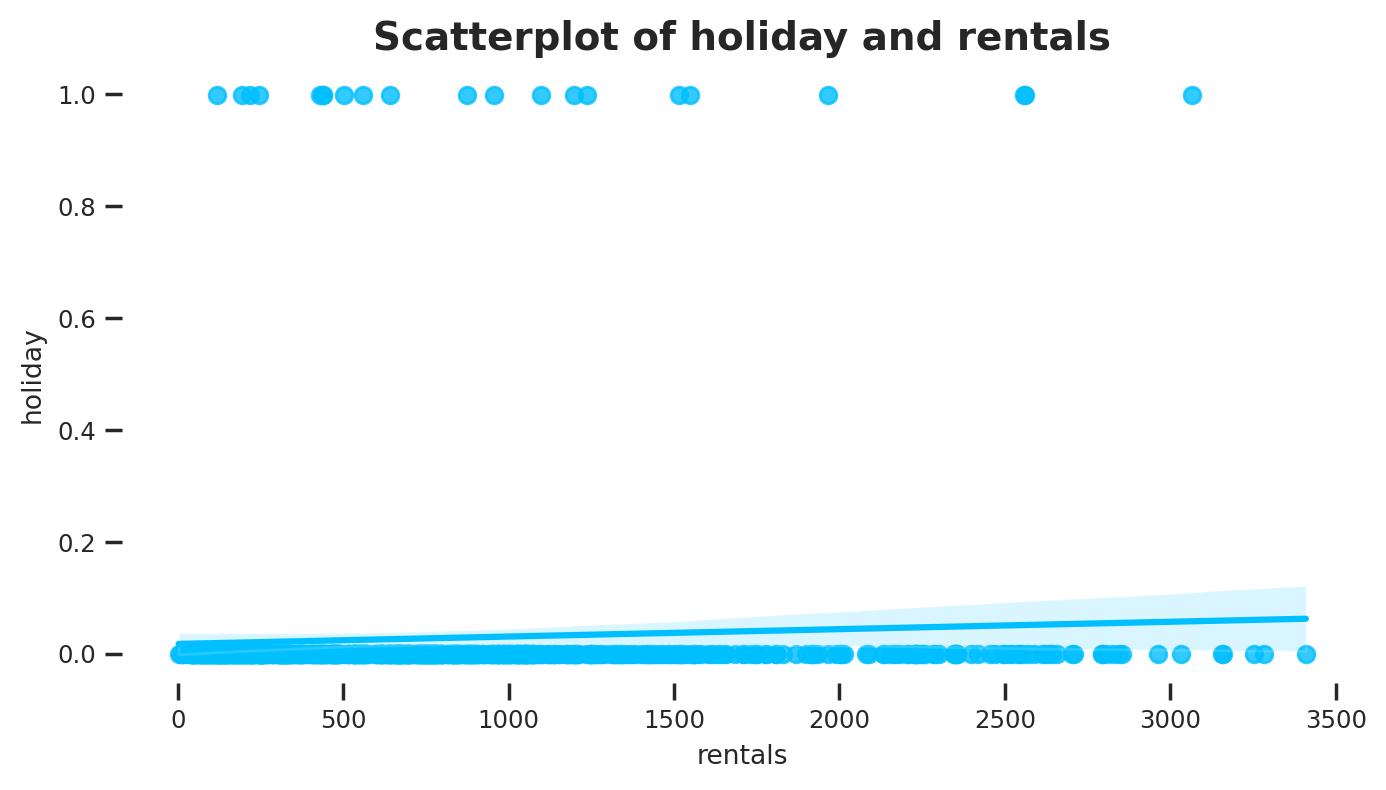

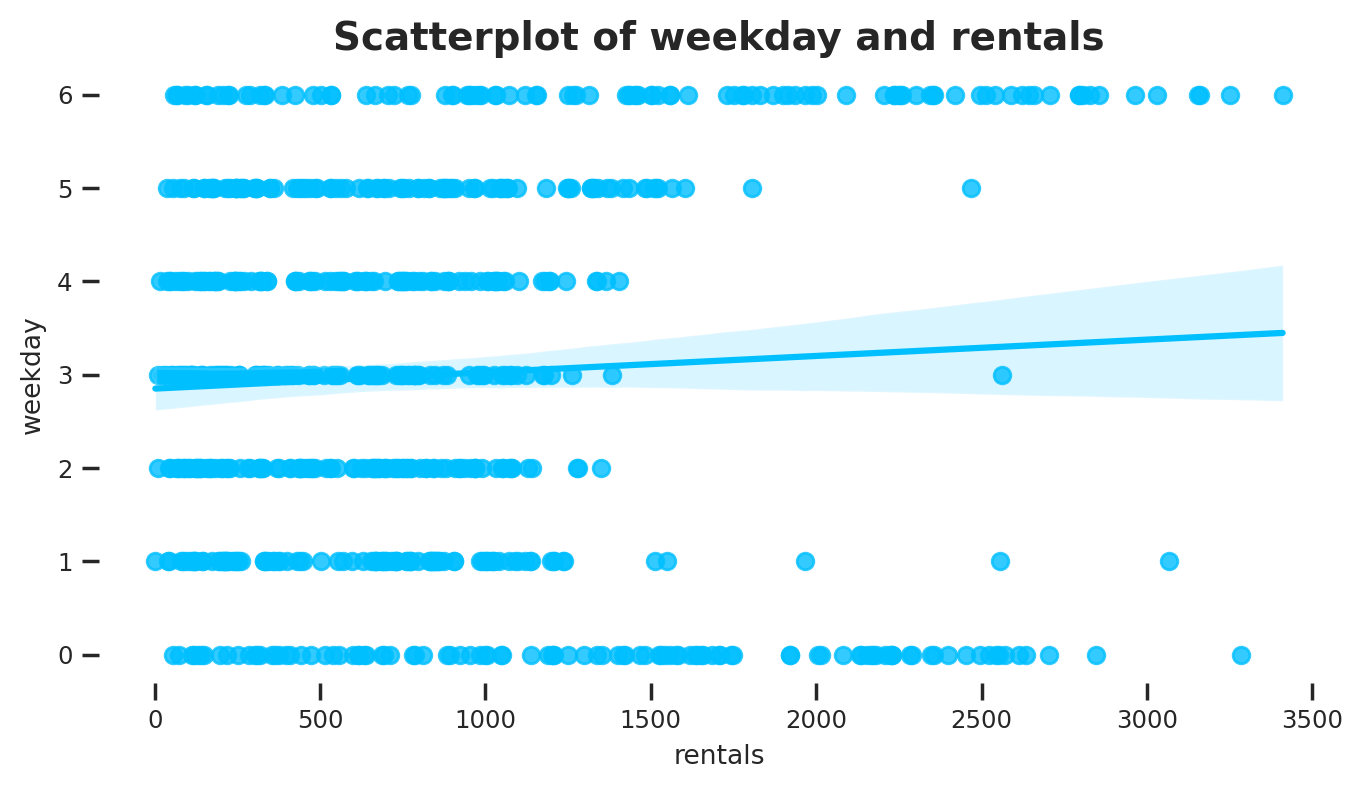

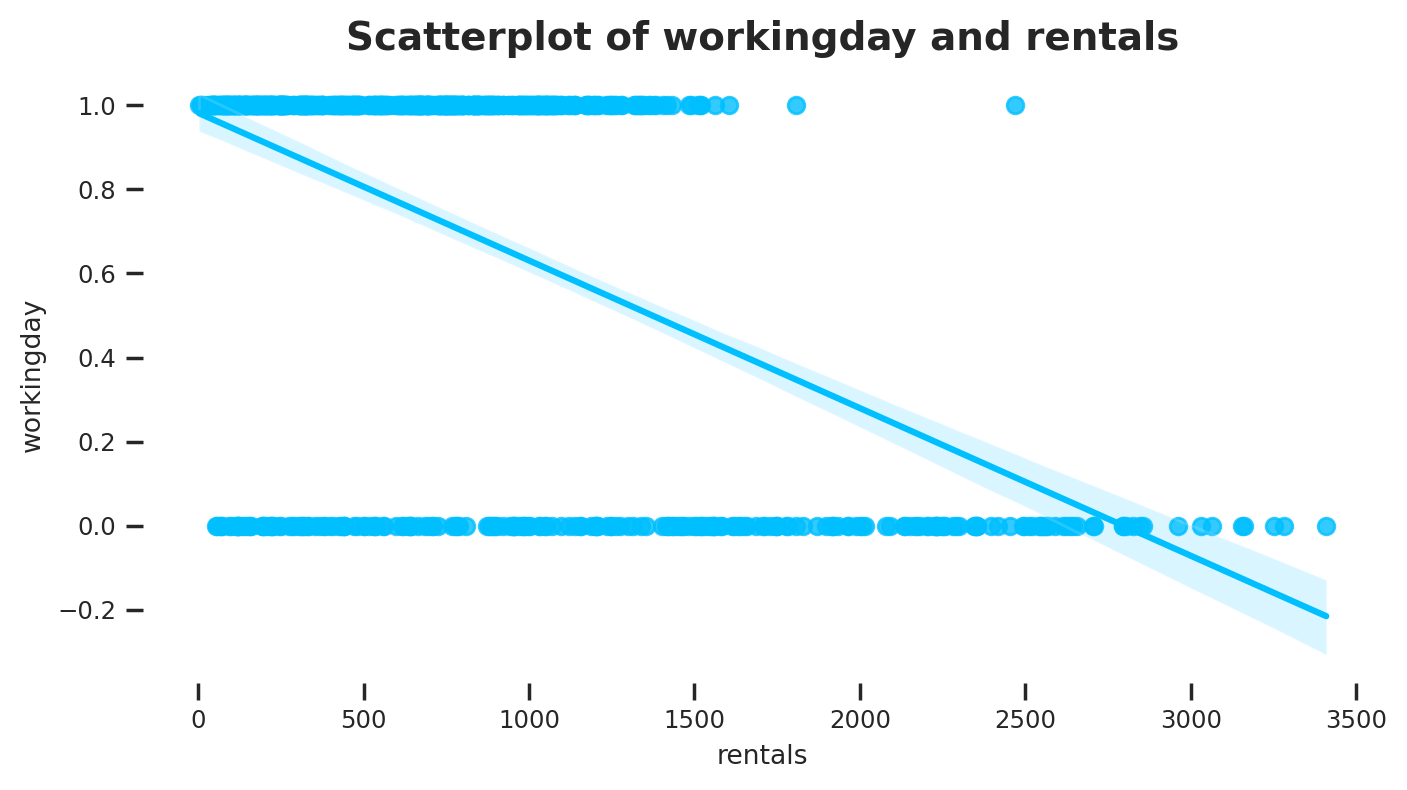

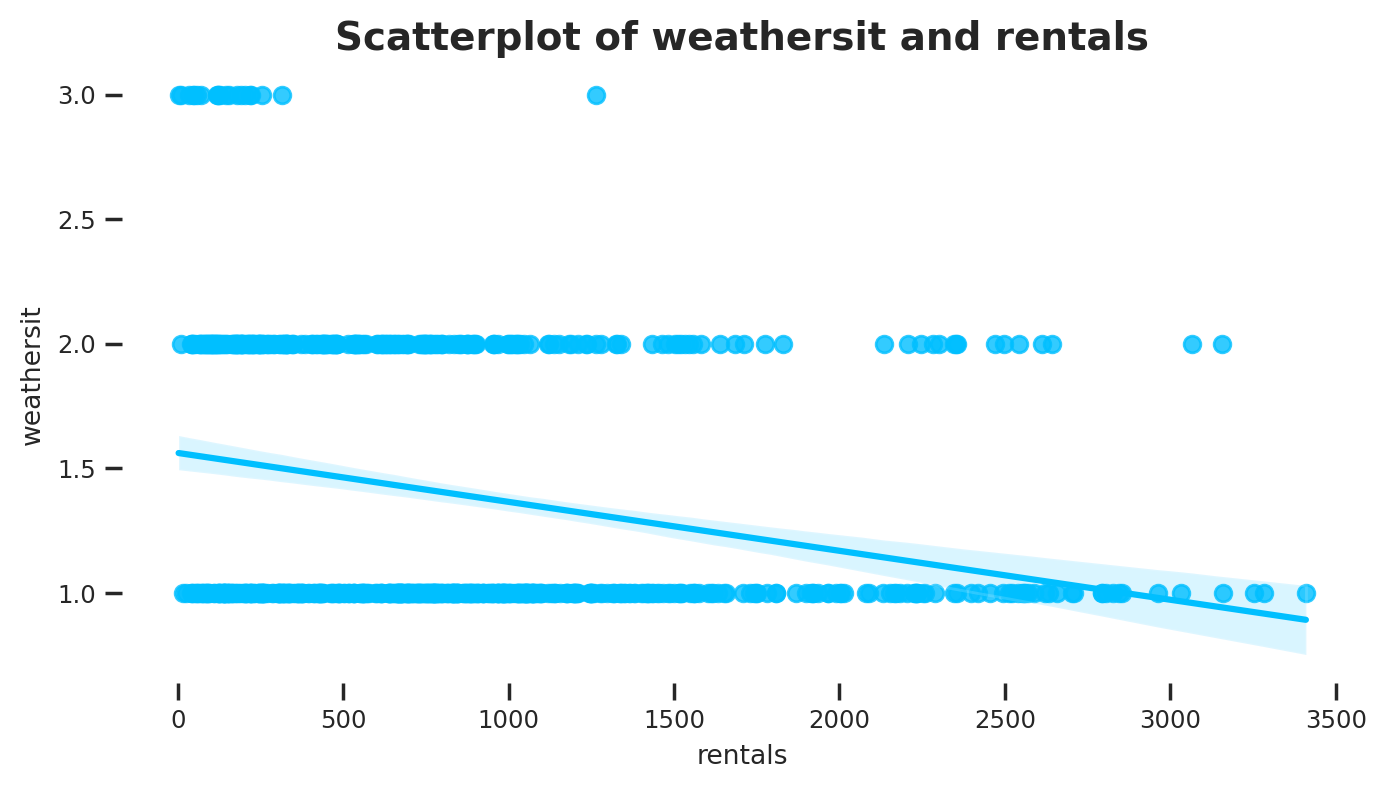

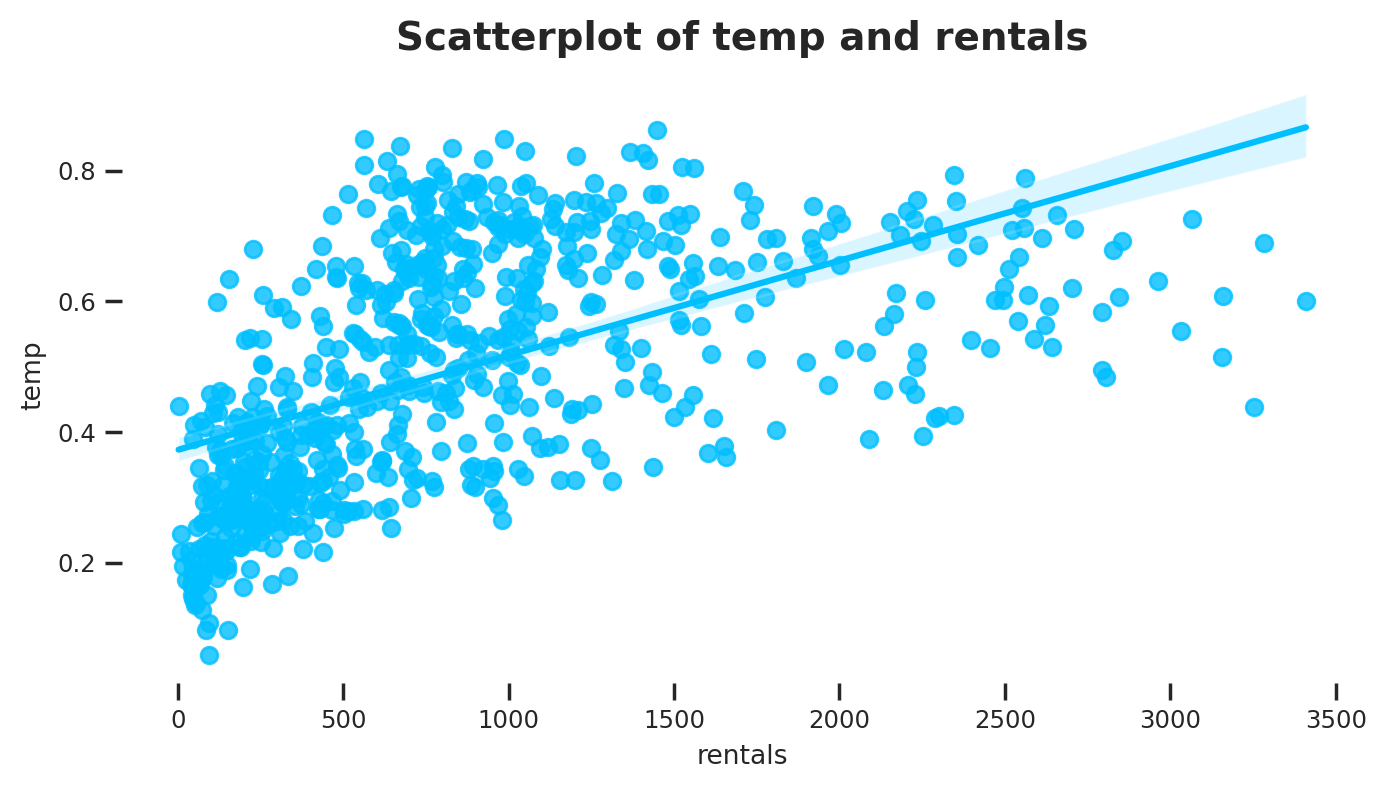

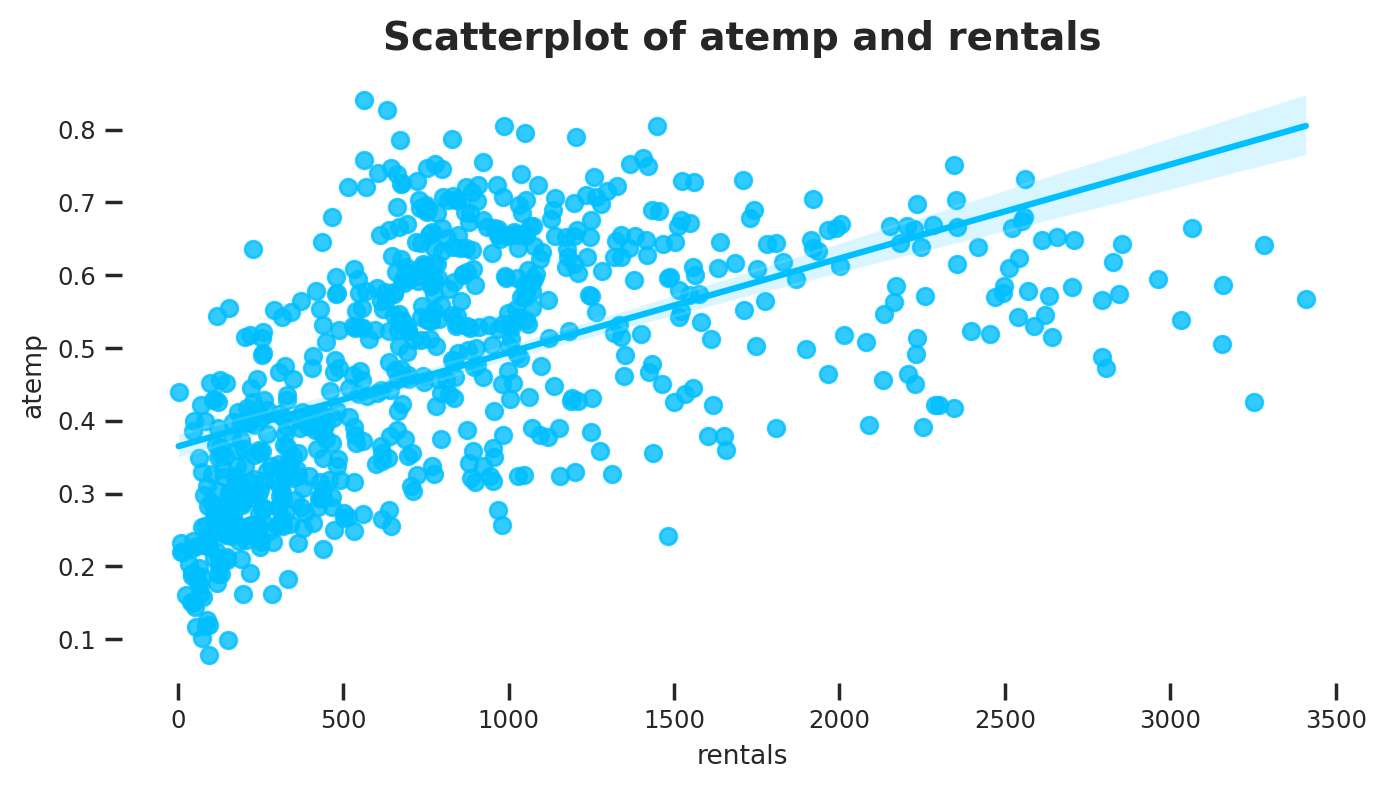

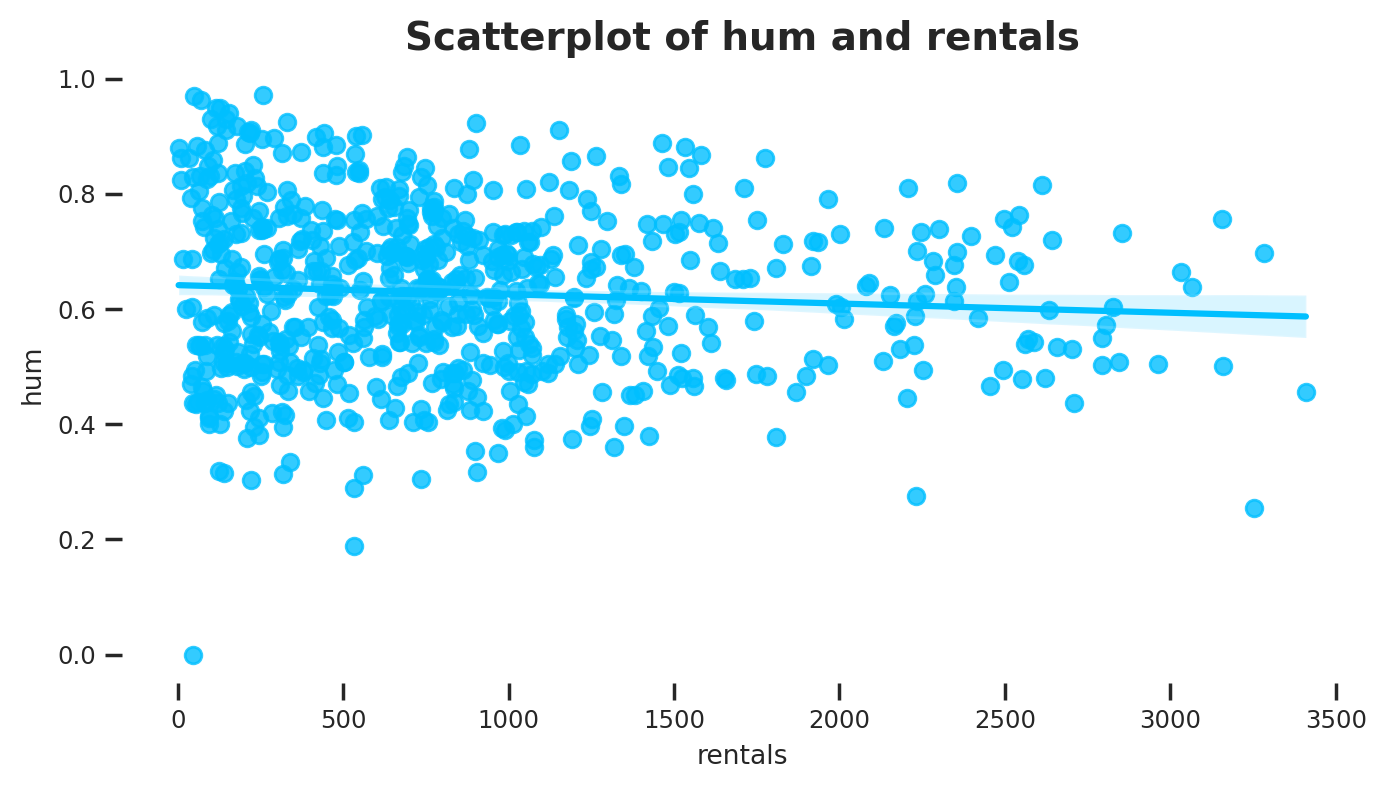

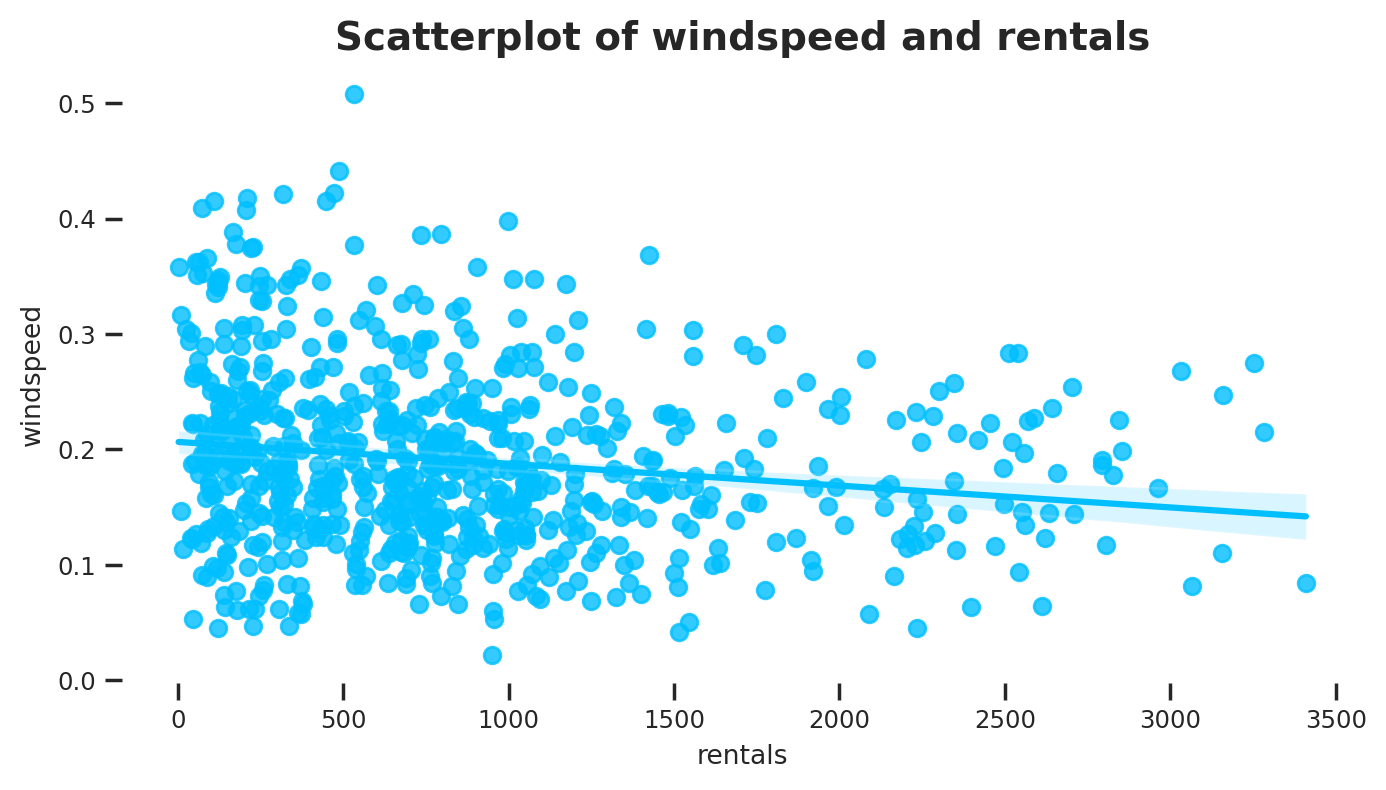

In [28]:
for column in df.columns:
    if column != 'rentals':
        plt.figure(figsize=(8,4))
        plt.title(f"Scatterplot of {column} and rentals", fontsize=14, fontweight='bold')
        ax = sns.regplot(data=df, x="rentals", y=column);

## Correlations

In [29]:
df.corr()

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
day,1.000000,0.009157,0.002061,-0.000861,-0.010710,-0.000428,0.009907,-0.023824,0.024253,0.018286,0.042753,0.021588,-0.013365
mnth,0.009157,1.000000,-0.001792,0.831440,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006
year,0.002061,-0.001792,1.000000,-0.001844,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546
season,-0.000861,0.831440,-0.001844,1.000000,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399
holiday,-0.010710,0.019191,0.007954,-0.010537,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274
weekday,-0.000428,0.009509,-0.005461,-0.003080,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923
workingday,0.009907,-0.005901,-0.002013,0.012485,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044
weathersit,-0.023824,0.043528,-0.048727,0.019211,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353
temp,0.024253,0.220205,0.047604,0.334315,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285
atemp,0.018286,0.227459,0.046106,0.342876,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864


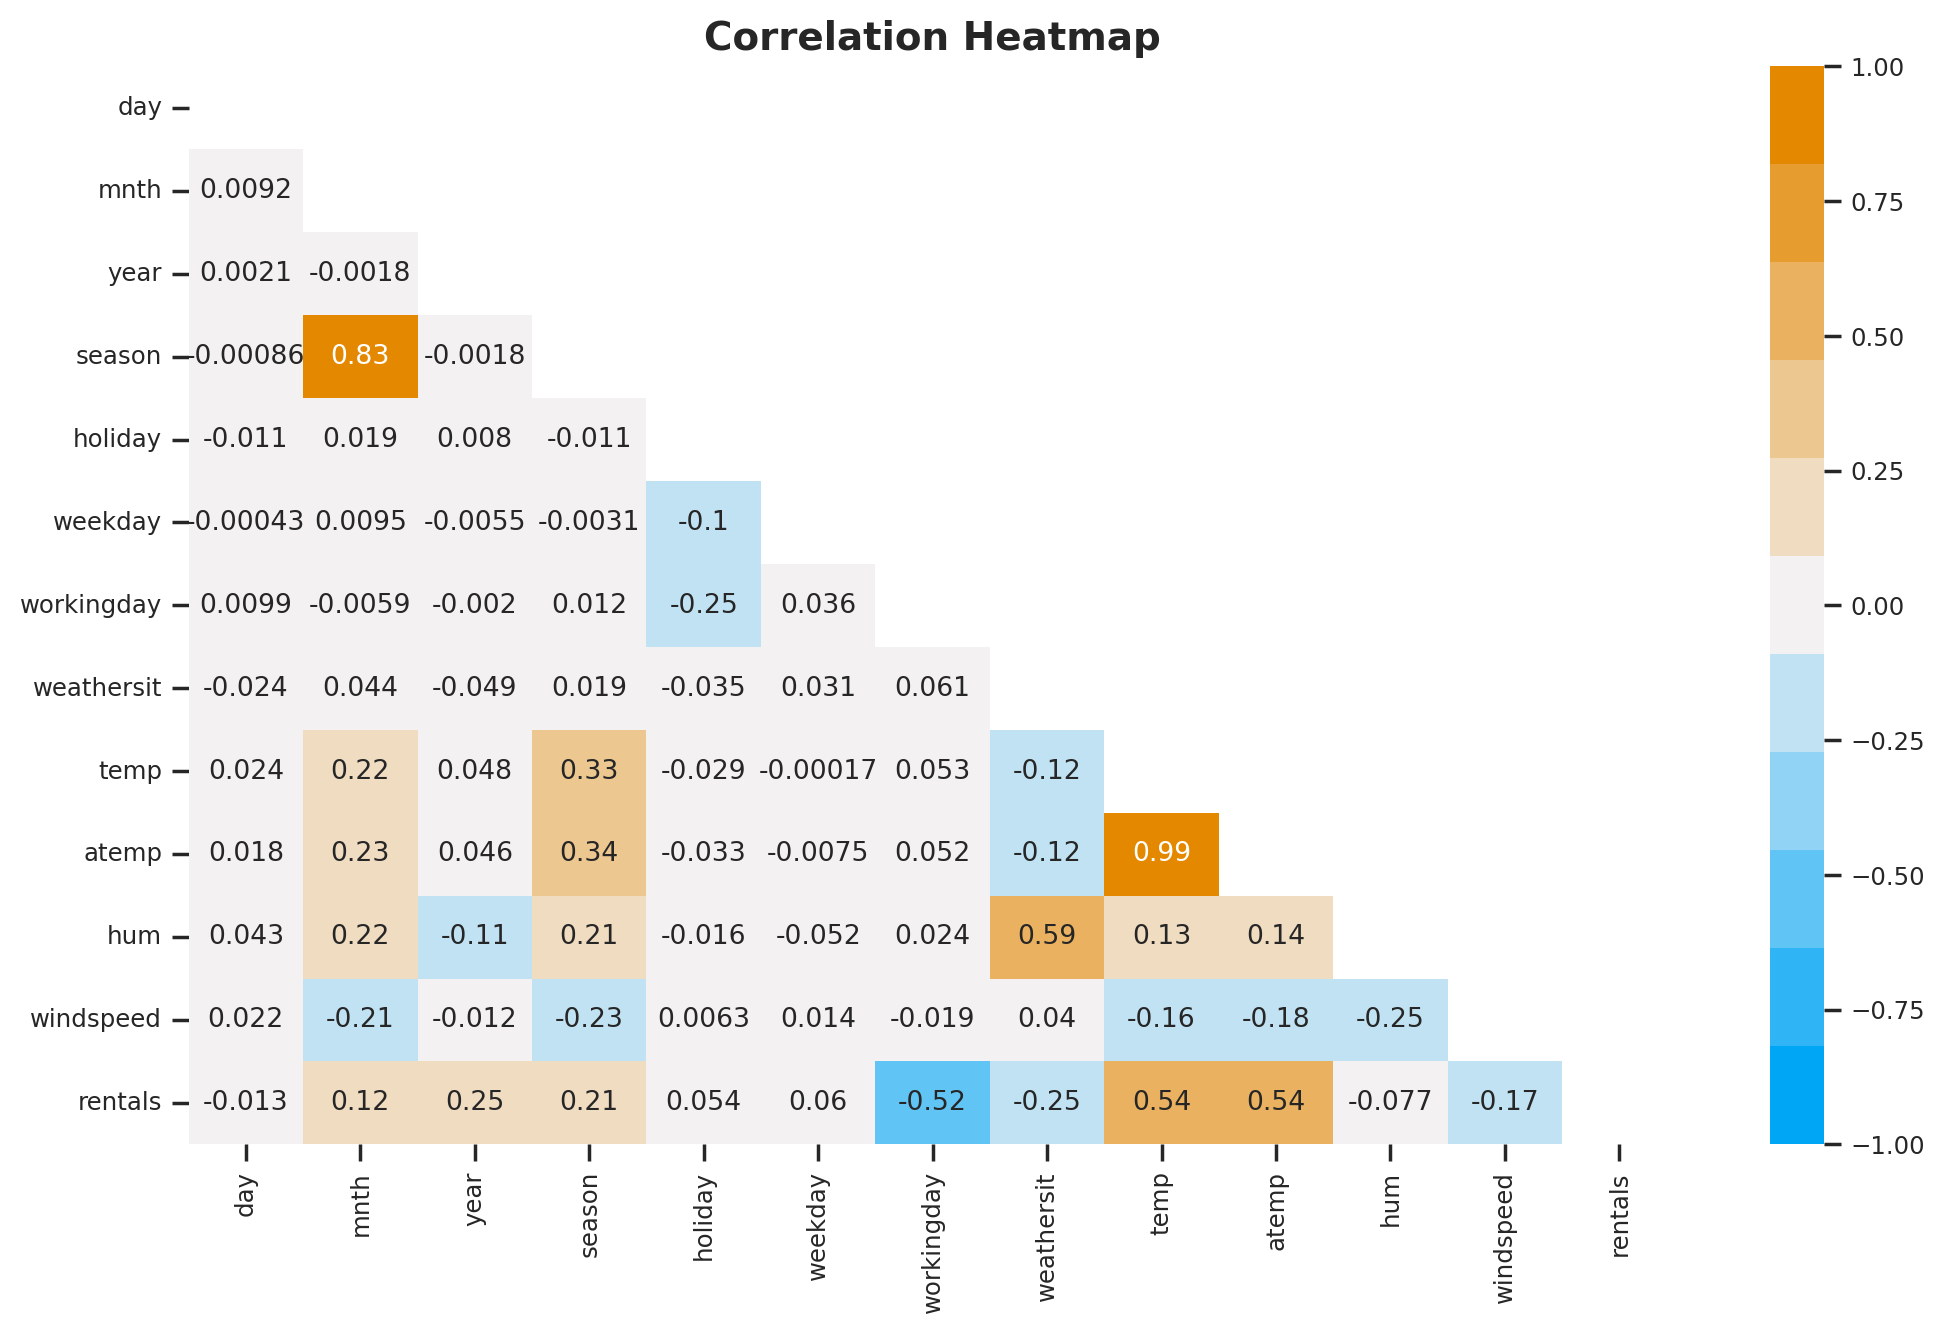

In [31]:
mask = np.triu(np.ones_like(df.corr()))
plt.figure(figsize=(12,7))
plt.title("Correlation Heatmap", fontsize=14, fontweight='bold')
ax = sns.heatmap(df.corr(), cmap=cpd, vmin=-1, vmax=1, mask=mask, annot=True);